<a href="https://colab.research.google.com/github/Ayombi/Phase-2-project/blob/main/Churn_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__PHASE 2 PROJECT SUBMISSION__
NAME: AMINA SAIDI
STUDENT PACE: PART TIME
PROJECT REVIEW DATE: 22ND MAY 2024
TM: NOAH KANDIE
PROJECT NAME: CUSTOMER CHURN

__BACKGROUND__
Syriatel Ltd is a Telecom company that would like a model  to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company. A lot of resources go into understanding whether a customer will leave the company. Having a clear prediction model will assist the customers in costs to invest in and the marketing strategies to retain the customer.

__PROBLEM STATEMENT__
This is a binary classification problem.The problem at hand is to Build a classifier that will assist the tele company predict the rate of the customers leaving to competitors i.e customer churn

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

DATA UNDERSTANDING

In [ ]:
file_path = r'C:\Users\ADMIN\OneDrive\Desktop\Data-Science\bigml_59c28831336c6604c800002a.csv'
df= pd.read_csv(file_path)

In [ ]:
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
df.sample()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
740,UT,67,510,414-9027,no,yes,20,230.6,40,39.2,...,58,16.07,162.2,115,7.3,9.4,2,2.54,1,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [ ]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


DATA CLEANING

In [ ]:
#lets make a copy of the dataset first
df.copy()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [ ]:
#handling missing values.
#Lets first identify if we have null values
df.isnull().sum()

There appears to be no missing values

In [ ]:
# Lets check for duplicated values
df.duplicated().any

__There are no duplicated values__

<strong>DROPPING IRRELEVANT VALUES

In [ ]:
#dropping the account length  column as it seems to be irrelevant
df = df.drop(columns=['account length', 'state'])
df.head()


,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


__CHANGING DATA TYPES__
We shall not change the float data types to integers as in this case, we may result to loosing some information. Instead, we shall normalize and scale the float features to a similar range before feeding them into the classification algorithm

__CHANGING COLUMN NAMES__
We will need to change the following column names into a continous string:
phone number,international plan, voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls

In [ ]:
# Define a dictionary with old column names as keys and new column names as values
rename_dict = {
    'area code': 'Area_code',
    'phone number': 'Phone_Number',
    'international plan': 'International_Plan',
    'voice mail plan': 'VoiceMail_Plan',
    'number vmail messages': 'Number_Vmail_Messages',
    'total day minutes': 'Total_Day_Minutes',
    'total day calls': 'Total_Day_Calls',
    'total day charge': 'Total_Day_Charge',
    'total eve minutes': 'Total_Eve_Minutes',
    'total eve calls': 'Total_Eve_Calls',
    'total eve charge': 'Total_Eve_Charge',
    'total night minutes': 'Total_Night_Minutes',
    'total night calls': 'Total_Night_Calls',
    'total night charge': 'Total_Night_Charge',
    'total intl minutes': 'Total_Intl_Minutes',
    'total intl calls': 'Total_Intl_Calls',
    'total intl charge': 'Total_Intl_Charge',
    'customer service calls': 'Customer_Service_Calls'
}

# Rename the columns using the rename method
df.rename(columns=rename_dict, inplace=True)

# Display the first few rows of the DataFrame to verify the changes
df.head()

,Area_code,Phone_Number,International_Plan,VoiceMail_Plan,Number_Vmail_Messages,Total_Day_Minutes,Total_Day_Calls,Total_Day_Charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,Customer_Service_Calls,churn
0,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:

# Display basic statistics for categorical columnsdf.describe(include=['O'])
df.describe(include=['O'])

,Phone_Number,International_Plan,VoiceMail_Plan
count,3333,3333,3333
unique,3333,2,2
top,382-4657,no,no
freq,1,3010,2411


In [ ]:
# Display basic statistics for numerical columns
df.describe()

,Area_code,Number_Vmail_Messages,Total_Day_Minutes,Total_Day_Calls,Total_Day_Charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,Customer_Service_Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


__STANDIDIZE CATEGORICAL VARIABLES__

In [ ]:
#df['state'] = df['state'].str.upper()
#df.head()

In [ ]:
df['Area_code'].unique()

array([415, 408, 510], dtype=int64)

__FEATURE ENGINEERING__

In [ ]:
# Example: Create a new feature for total minutes used
df['Total_Minutes'] = df['Total_Day_Minutes'] + df['Total_Eve_Minutes'] + df['Total_Night_Minutes'] + df['Total_Intl_Minutes']
df['Total_Minutes']

__ENCODE CATEGORICAL VARIABLES__

In [ ]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['International_Plan','VoiceMail_Plan'], drop_first=True)
df.head()

,Area_code,Phone_Number,Number_Vmail_Messages,Total_Day_Minutes,Total_Day_Calls,Total_Day_Charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,Customer_Service_Calls,churn,International_Plan_yes,VoiceMail_Plan_yes
0,415,382-4657,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,False,True
1,415,371-7191,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,False,True
2,415,358-1921,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,False,False
3,408,375-9999,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,True,False
4,415,330-6626,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,True,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area_code               3333 non-null   int64  
 1   Phone_Number            3333 non-null   object 
 2   Number_Vmail_Messages   3333 non-null   int64  
 3   Total_Day_Minutes       3333 non-null   float64
 4   Total_Day_Calls         3333 non-null   int64  
 5   Total_Day_Charge        3333 non-null   float64
 6   Total_Eve_Minutes       3333 non-null   float64
 7   Total_Eve_Calls         3333 non-null   int64  
 8   Total_Eve_Charge        3333 non-null   float64
 9   Total_Night_Minutes     3333 non-null   float64
 10  Total_Night_Calls       3333 non-null   int64  
 11  Total_Night_Charge      3333 non-null   float64
 12  Total_Intl_Minutes      3333 non-null   float64
 13  Total_Intl_Calls        3333 non-null   int64  
 14  Total_Intl_Charge       3333 non-null   

__REMOVE DASHES FROM THE PHONE NUMBER COLUMN__

In [ ]:
# Remove dashes from the phone number column
df['Phone_Number'] = df['Phone_Number'].astype(str).str.replace('-', '', regex=False)
df['Phone_Number']

0       3824657
1       3717191
2       3581921
3       3759999
4       3306626
         ...   
3328    4144276
3329    3703271
3330    3288230
3331    3646381
3332    4004344
Name: Phone_Number, Length: 3333, dtype: object

__CHANGING DATA TYPES__

In [ ]:
#The phone number data type needs to be changed.
df['Phone_Number'] = df['Phone_Number'].astype(int)


__NORMALIZE/SCALE NUMERICAL FEATURES__

In [ ]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to scale
num_cols = ['Area_code', 'Phone_Number','Number_Vmail_Messages', 'Total_Day_Minutes','Total_Day_Calls','Total_Day_Charge',
            'Total_Eve_Minutes','Total_Eve_Calls','Total_Eve_Charge','Total_Night_Minutes',
            'Total_Night_Calls','Total_Night_Charge', 'Total_Intl_Minutes','Total_Intl_Calls','Total_Intl_Charge',
            'Customer_Service_Calls']
# Initialize the scalerTotal_Intl_CallsTotal_Intl_Calls
scaler = StandardScaler()
# Fit and transform the numerical columns
df[num_cols] = scaler.fit_transform(df[num_cols])
df[num_cols]


,Area_code,Phone_Number,Number_Vmail_Messages,Total_Day_Minutes,Total_Day_Calls,Total_Day_Charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,Customer_Service_Calls
0,-0.523603,0.285359,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932
1,-0.523603,-0.105965,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932
2,-0.523603,-0.598534,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218
3,-0.688834,0.049915,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354
4,-0.523603,-1.600987,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,-0.523603,1.449212,2.038605,-0.432895,-1.167924,-0.433386,0.286348,1.299506,0.286880,1.547039,-0.874374,1.547188,-0.120832,0.617898,-0.125496,0.332354
3329,-0.523603,-0.156653,-0.591760,0.942447,-2.164631,0.942714,-0.938353,-2.264816,-0.938172,-0.189297,1.170023,-0.188670,-0.228304,-0.194831,-0.231645,1.092641
3330,1.718817,-1.667974,-0.591760,0.018820,0.426808,0.019193,1.731930,-2.114211,1.732349,-0.177431,-0.465494,-0.175486,1.383778,0.617898,1.387123,0.332354
3331,1.718817,-0.363811,-0.591760,0.624778,0.227466,0.625153,-0.816080,-0.808966,-0.815203,-1.219628,1.885562,-1.221396,-1.876211,2.243356,-1.876950,0.332354


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area_code               3333 non-null   float64
 1   Phone_Number            3333 non-null   float64
 2   Number_Vmail_Messages   3333 non-null   float64
 3   Total_Day_Minutes       3333 non-null   float64
 4   Total_Day_Calls         3333 non-null   float64
 5   Total_Day_Charge        3333 non-null   float64
 6   Total_Eve_Minutes       3333 non-null   float64
 7   Total_Eve_Calls         3333 non-null   float64
 8   Total_Eve_Charge        3333 non-null   float64
 9   Total_Night_Minutes     3333 non-null   float64
 10  Total_Night_Calls       3333 non-null   float64
 11  Total_Night_Charge      3333 non-null   float64
 12  Total_Intl_Minutes      3333 non-null   float64
 13  Total_Intl_Calls        3333 non-null   float64
 14  Total_Intl_Charge       3333 non-null   

__OUTLIERS__

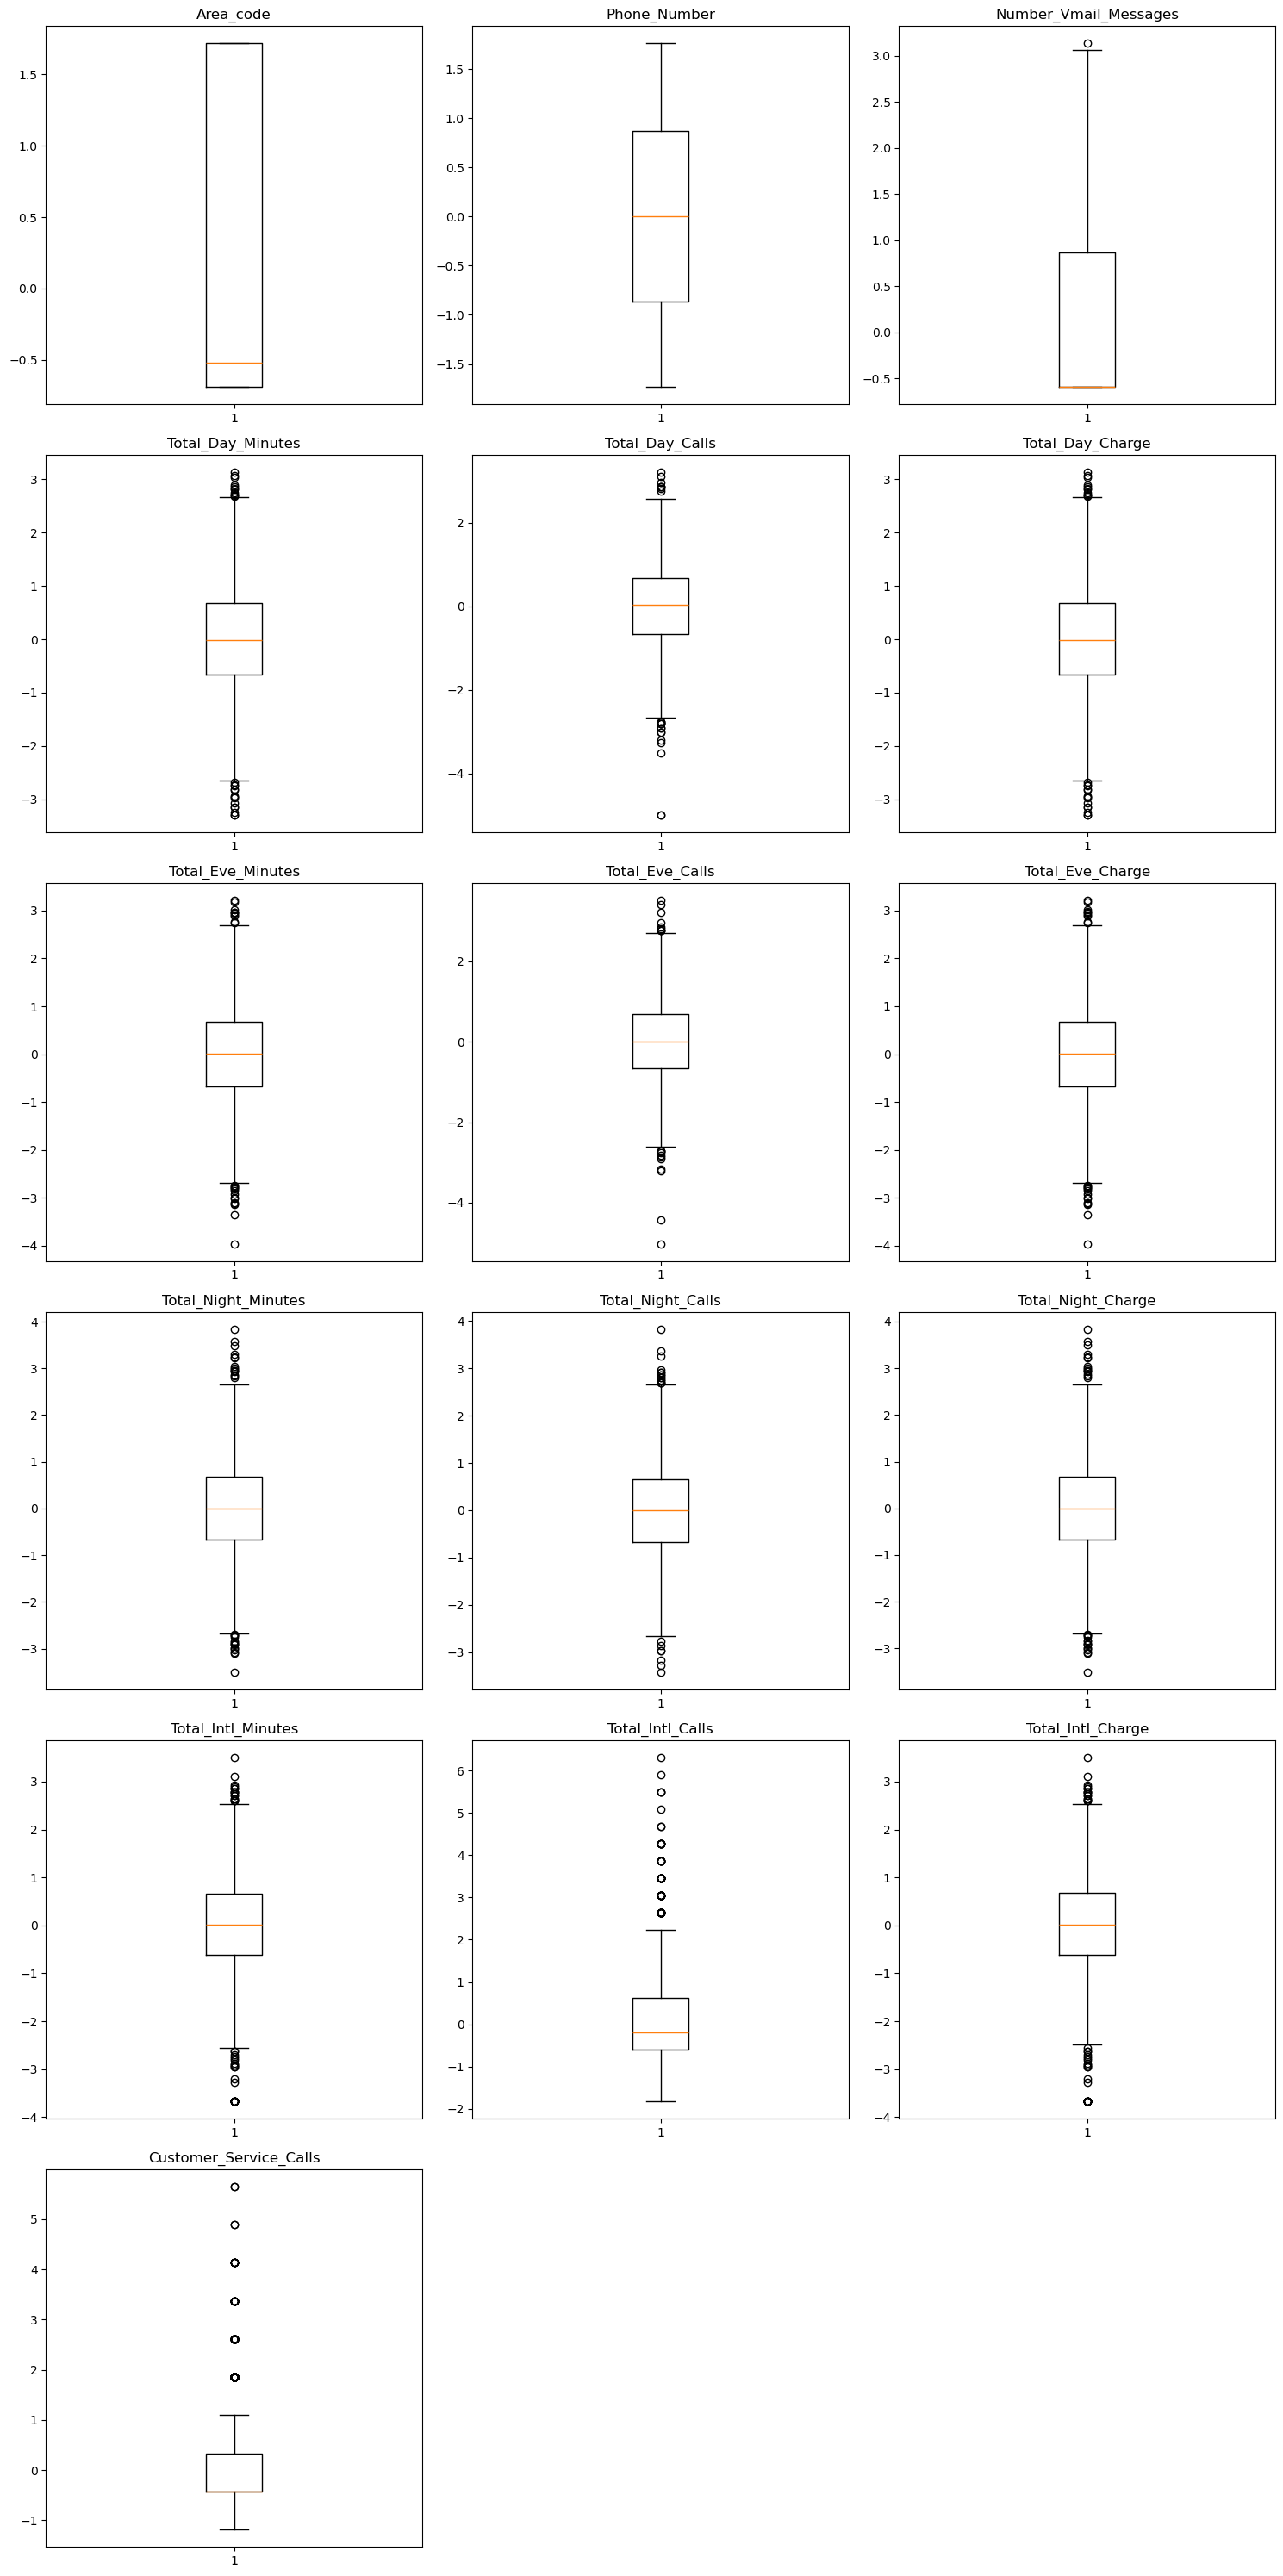

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64', 'int32'])

# Plot box plots for each numeric column
num_cols = len(numeric_columns.columns)
cols_per_row = 3
num_rows = (num_cols - 1) // cols_per_row + 1

plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(numeric_columns.columns):
    plt.subplot(num_rows, cols_per_row, i+1)
    plt.boxplot(numeric_columns[col])
    plt.title(col)
plt.tight_layout()
plt.show()

We have noted that we do not have outliers in the Area_code and Phone_Number

__REMOVING OUTLIERS_
We will not drop but use the Z scoring method.

In [ ]:
# Columns to check for outliers
columns_to_check = ['Number_Vmail_Messages', 'Total_Day_Minutes', 'Total_Day_Calls','Total_Day_Charge','Total_Eve_Minutes','Total_Eve_Calls','Total_Eve_Charge',
                    'Total_Night_Minutes','Total_Night_Calls','Total_Night_Charge','Total_Intl_Minutes','Total_Intl_Calls','Total_Intl_Charge','Total_Intl_Charge',
                    'Customer_Service_Calls']

# Calculate z-scores for selected columns
z_scores = np.abs((df[columns_to_check] - df[columns_to_check].mean()) / df[columns_to_check].std())

# Define threshold for outlier detection (e.g., z-score > 3)
threshold = 3

# Identify rows with outliers based on z-scores
outlier_mask = (z_scores > threshold).any(axis=1)

# Filter out rows containing outliers
data_filtered = df[~outlier_mask]
# Display summary (optional)
print(f"Original DataFrame shape: {df.shape}")
print(f"Filtered DataFrame shape (after removing outliers): {data_filtered.shape}")
# Optionally, you can assign the filtered DataFrame back to 'data' if needed
df = data_filtered



Original DataFrame shape: (3333, 19)
Filtered DataFrame shape (after removing outliers): (3176, 19)


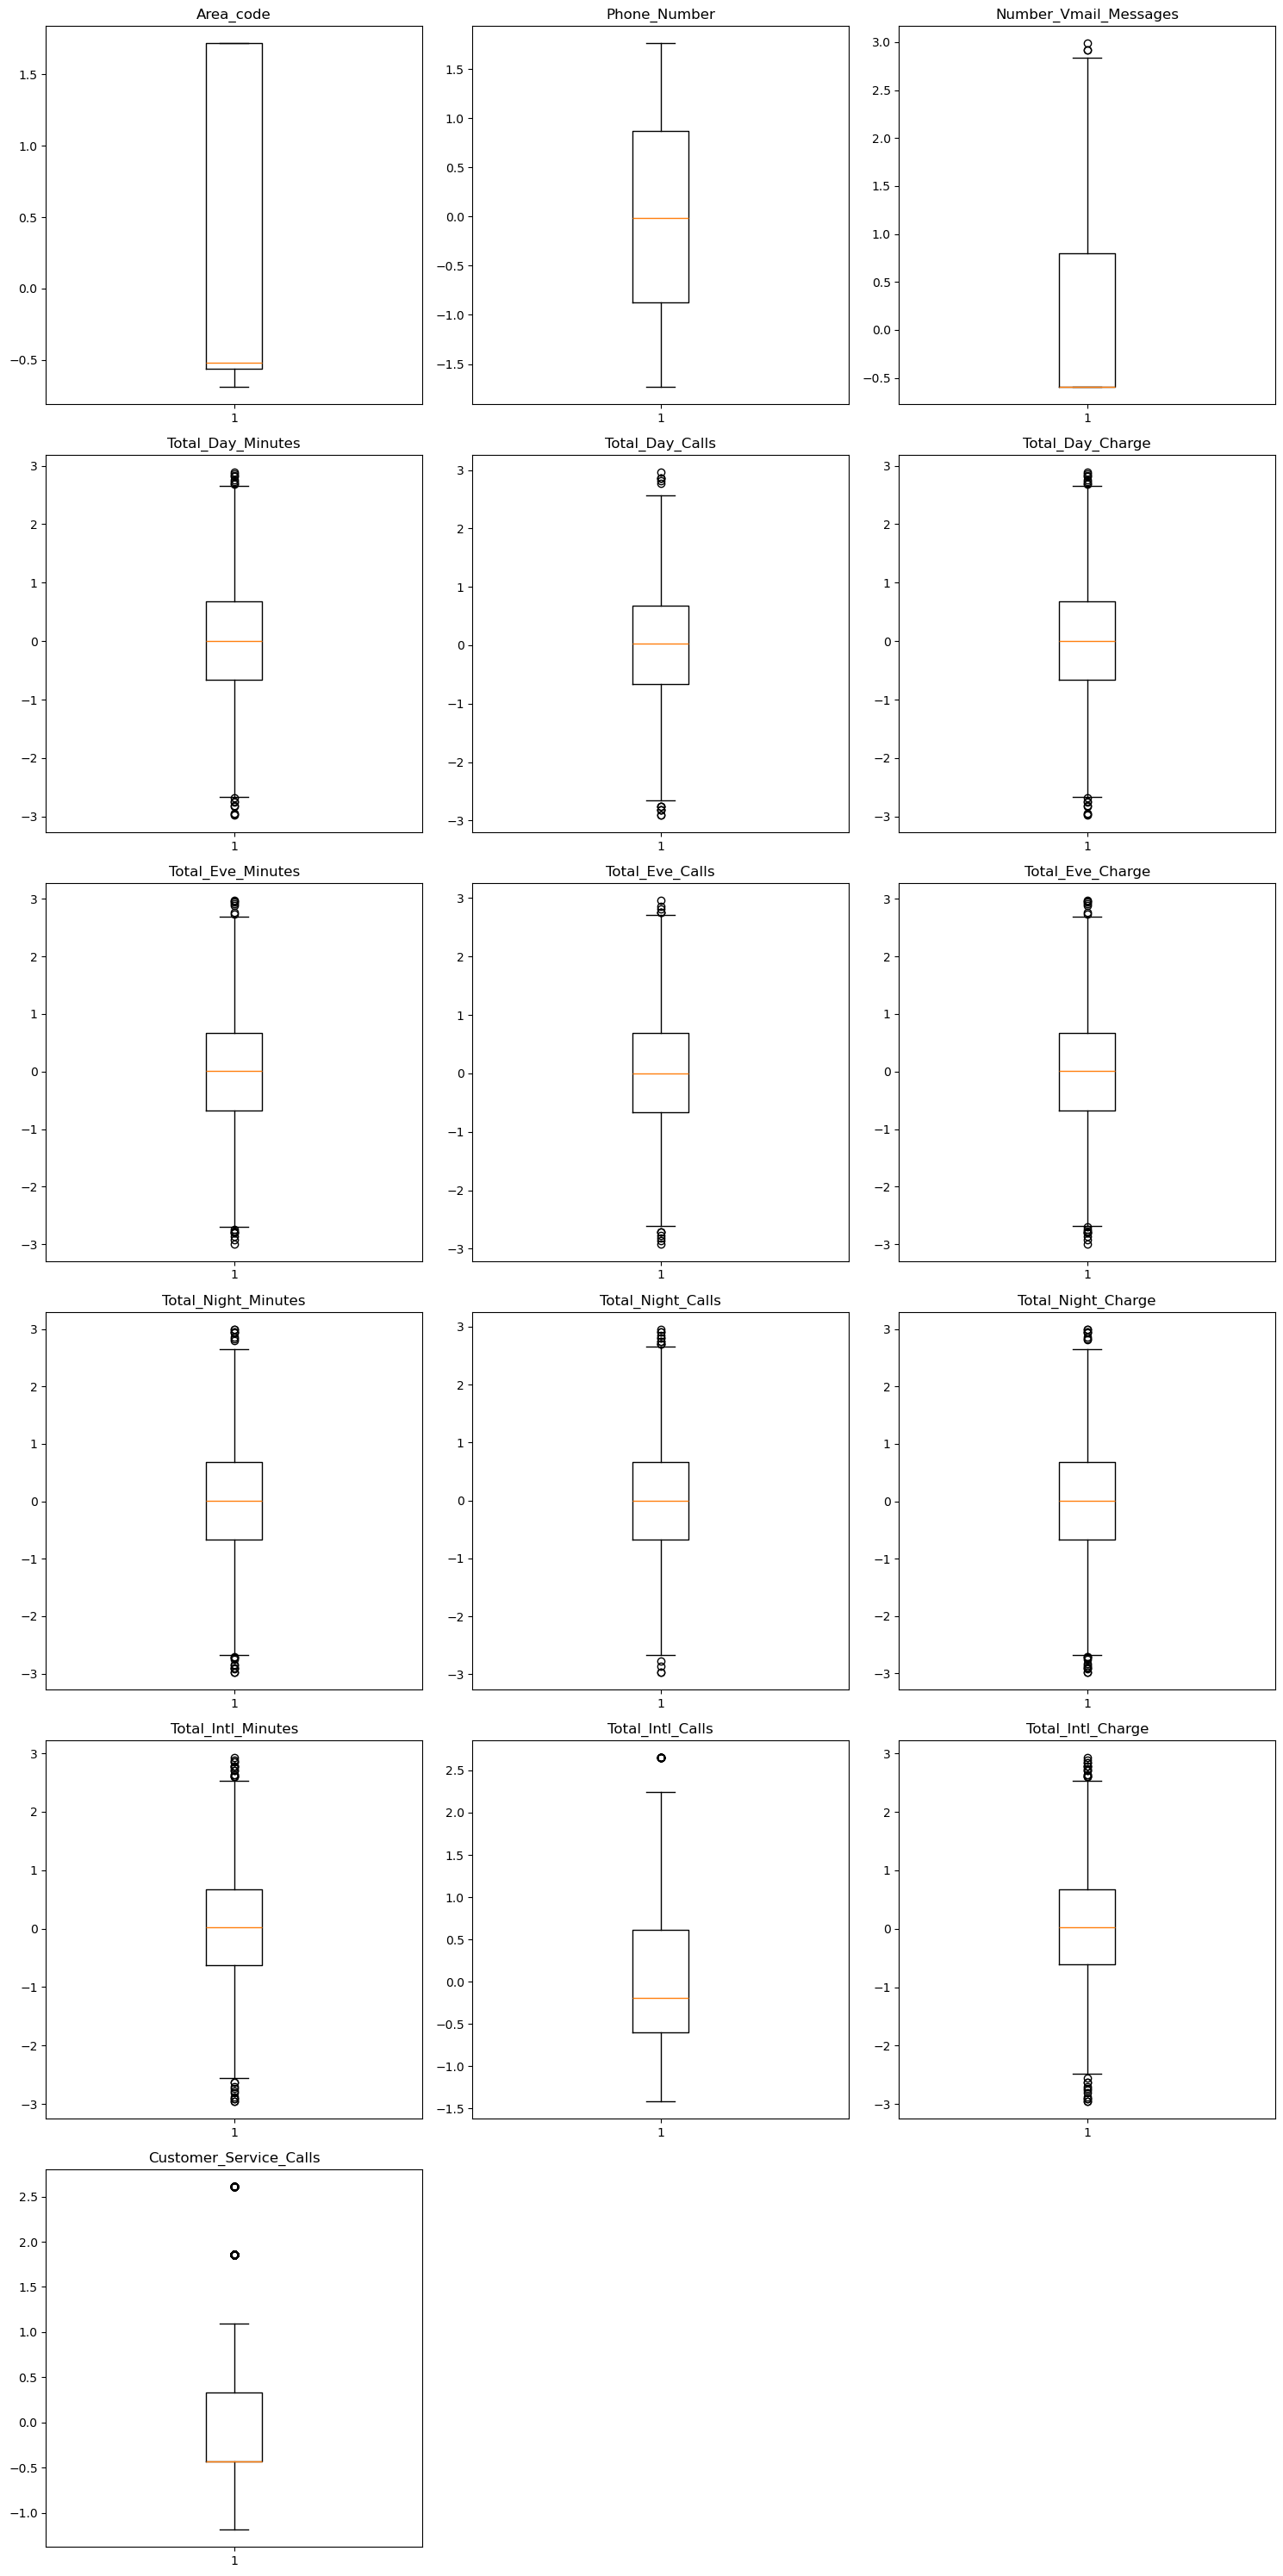

In [ ]:
#lets check if the data still has outliers.
numeric_columns = df.select_dtypes(include=['float64', 'int64', 'int32'])

# Plot box plots for each numeric column
num_cols = len(numeric_columns.columns)
cols_per_row = 3
num_rows = (num_cols - 1) // cols_per_row + 1

plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(numeric_columns.columns):
    plt.subplot(num_rows, cols_per_row, i+1)
    plt.boxplot(numeric_columns[col])
    plt.title(col)
plt.tight_layout()
plt.show()

<strong> COLINEARITY AND MULTICOLINEARITY

In [ ]:
df_corr = df.corr()['churn'].map(abs).sort_values(ascending=False)
df_corr

churn                     1.000000
International_Plan_yes    0.262072
Total_Day_Minutes         0.219973
Total_Day_Charge          0.219972
Customer_Service_Calls    0.172911
VoiceMail_Plan_yes        0.106400
Total_Eve_Minutes         0.097405
Total_Eve_Charge          0.097392
Number_Vmail_Messages     0.094577
Total_Intl_Calls          0.067234
Total_Intl_Charge         0.064088
Total_Intl_Minutes        0.064064
Total_Night_Charge        0.040109
Total_Night_Minutes       0.040099
Total_Day_Calls           0.020796
Area_code                 0.009672
Total_Eve_Calls           0.007683
Phone_Number              0.005428
Total_Night_Calls         0.003938
Name: churn, dtype: float64

From the correlation analysis, it clearly indicates that there is very low linea relationship thus a classification problem.

__UNIRIATE ANALYSIS__
__Numerical Features__

C:\Users\ADMIN\anaconda3\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


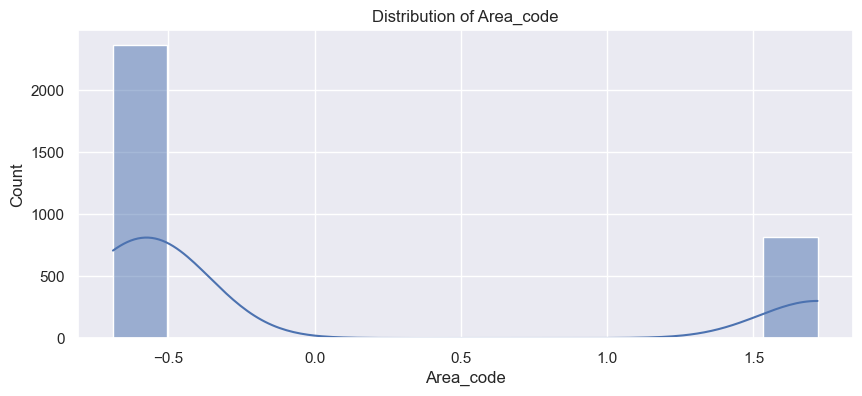

C:\Users\ADMIN\anaconda3\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


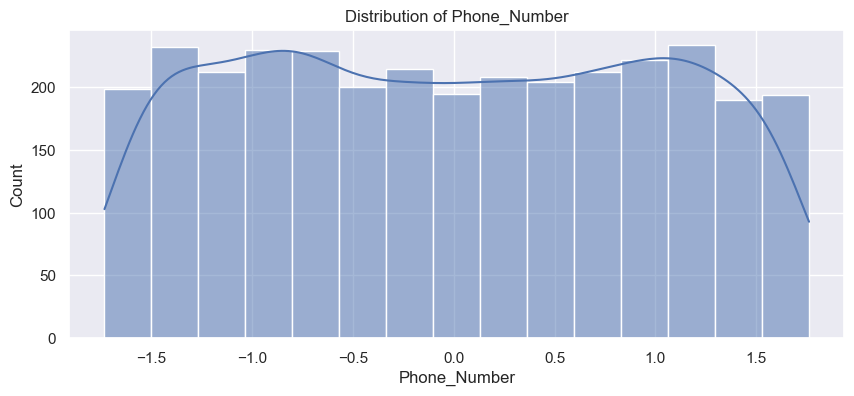

C:\Users\ADMIN\anaconda3\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


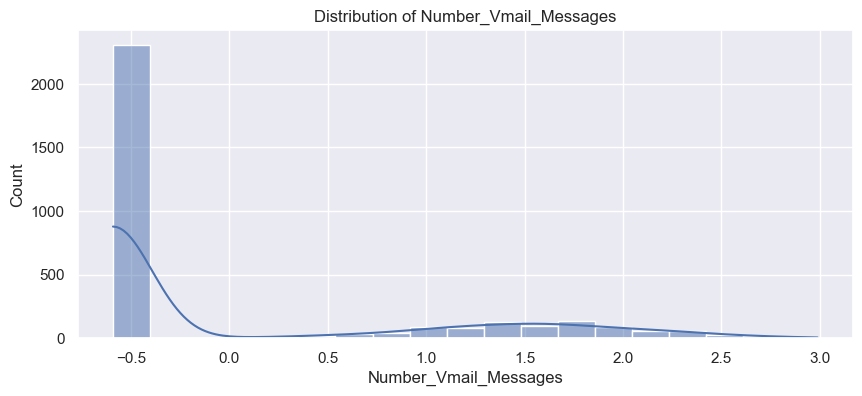

C:\Users\ADMIN\anaconda3\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


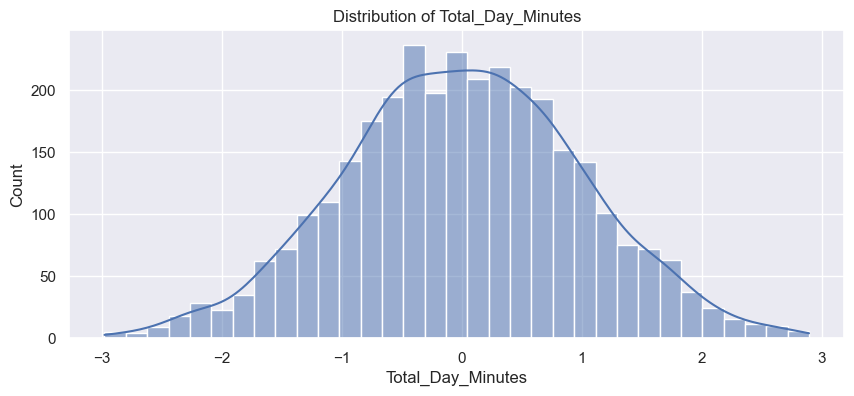

C:\Users\ADMIN\anaconda3\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


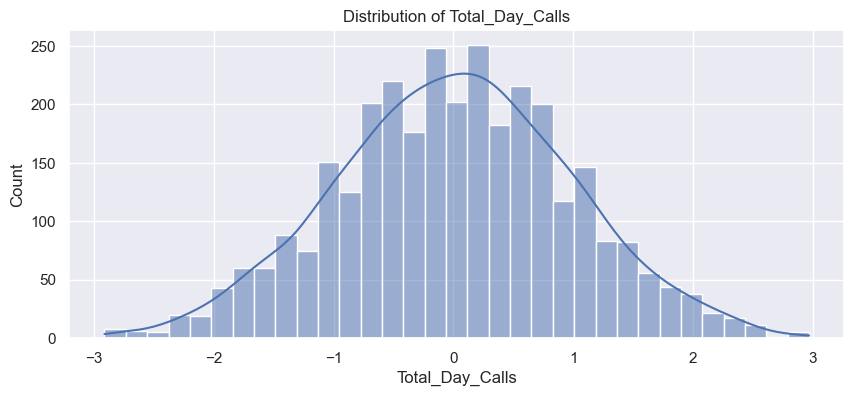

C:\Users\ADMIN\anaconda3\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


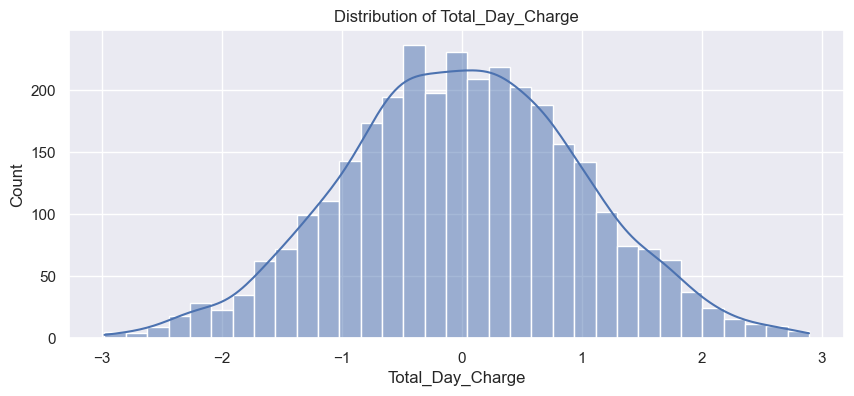

C:\Users\ADMIN\anaconda3\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


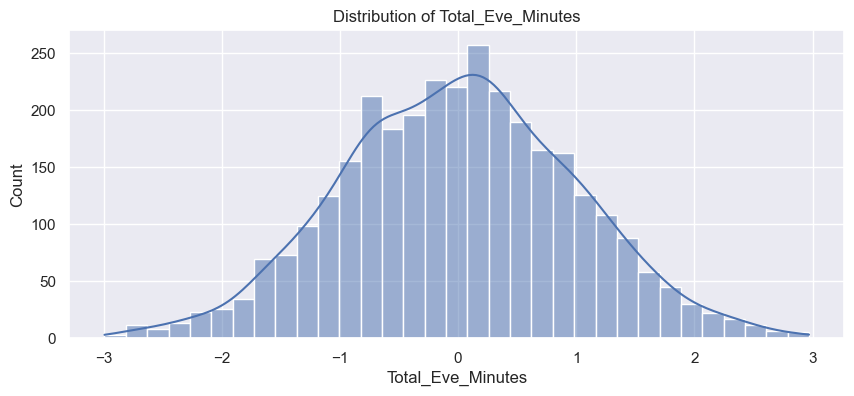

C:\Users\ADMIN\anaconda3\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


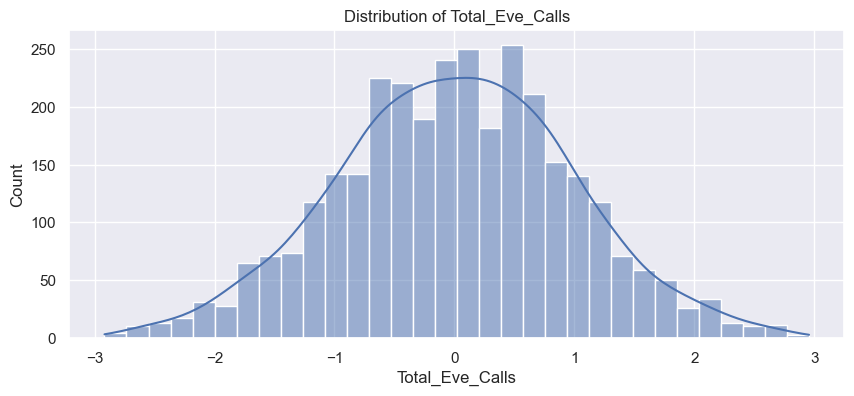

C:\Users\ADMIN\anaconda3\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


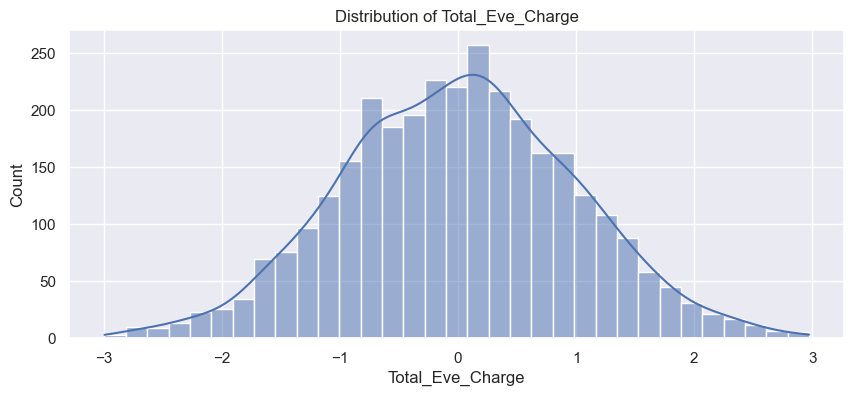

C:\Users\ADMIN\anaconda3\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


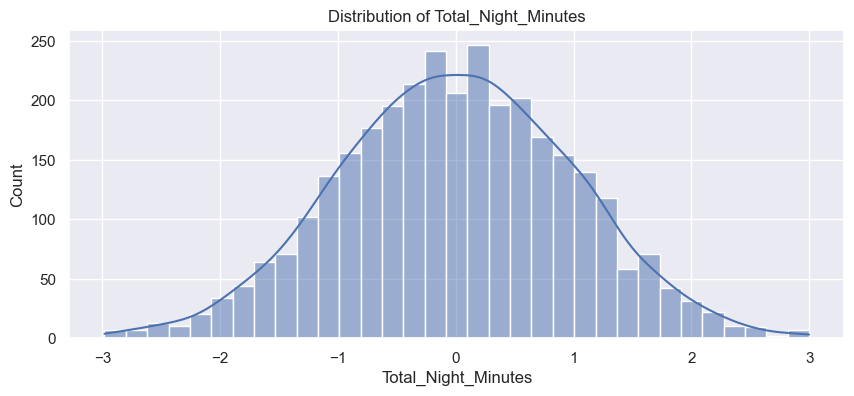

C:\Users\ADMIN\anaconda3\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


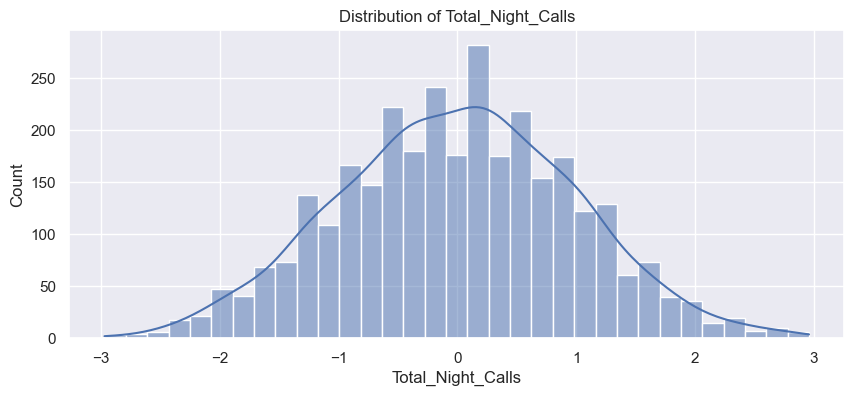

C:\Users\ADMIN\anaconda3\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


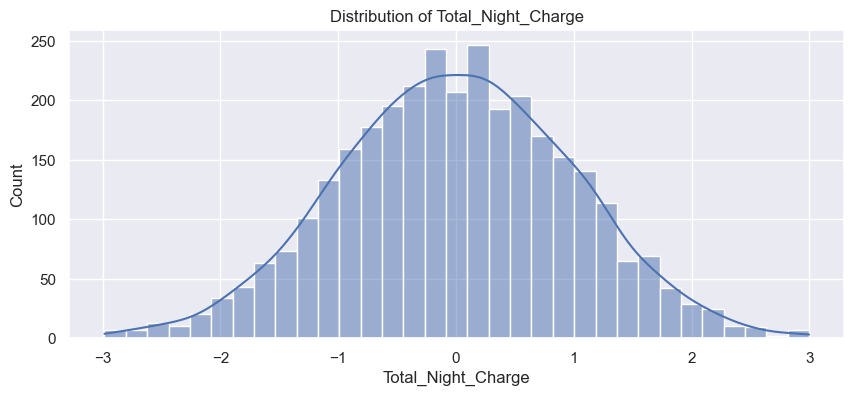

C:\Users\ADMIN\anaconda3\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


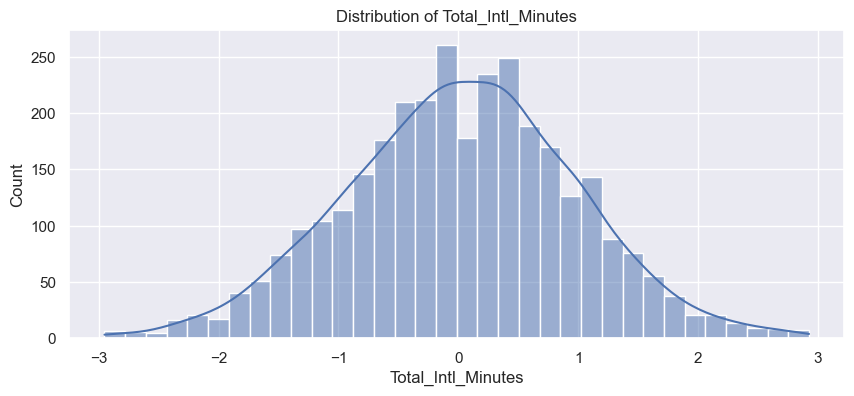

C:\Users\ADMIN\anaconda3\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


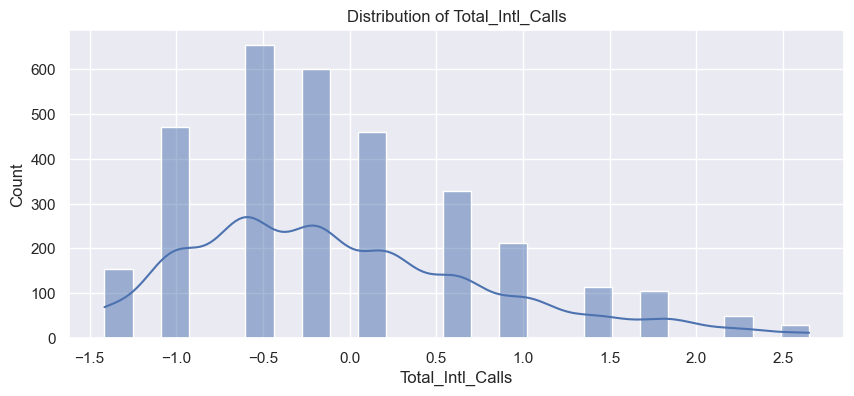

C:\Users\ADMIN\anaconda3\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


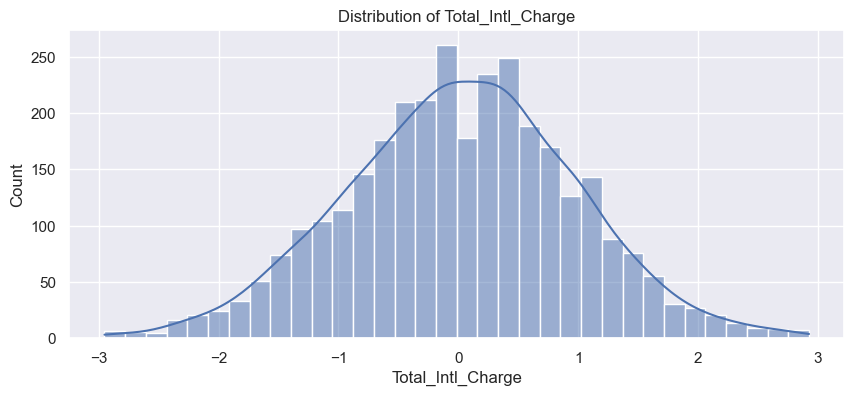

C:\Users\ADMIN\anaconda3\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


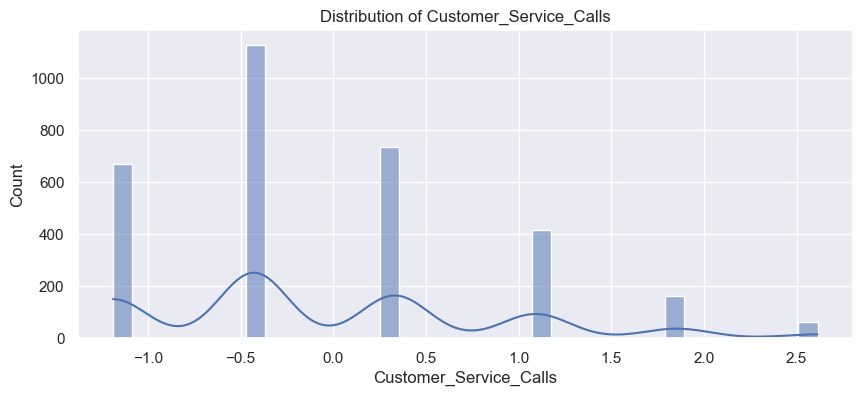

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for feature in numeric_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

__Categorical Features__

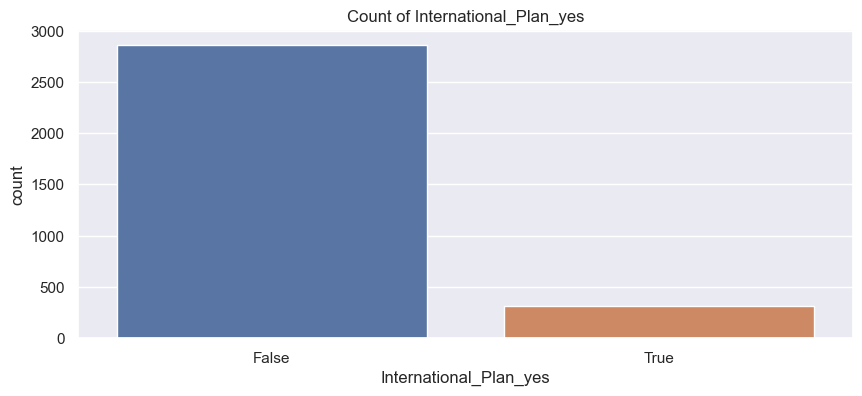

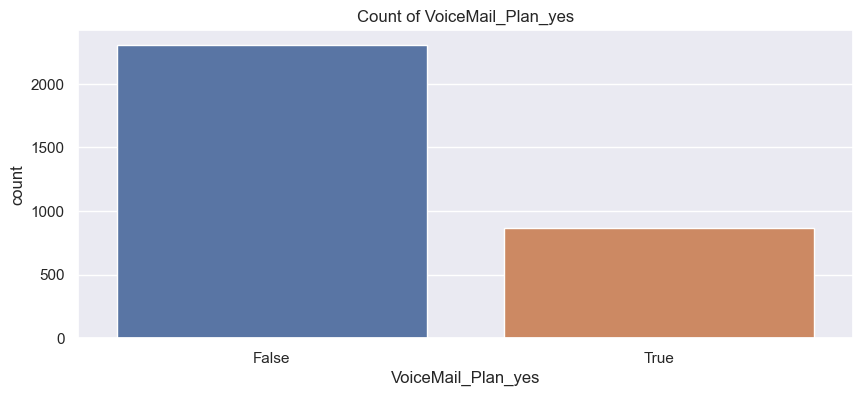

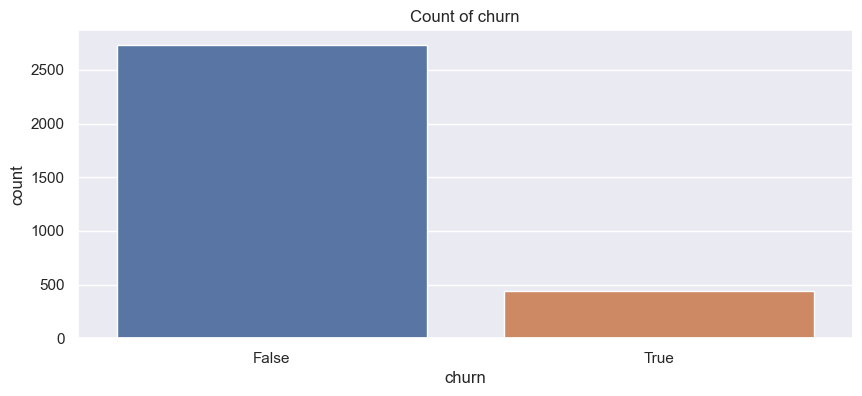

In [ ]:
categorical_features = ['International_Plan_yes', 'VoiceMail_Plan_yes', 'churn']

for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=feature, data=df)
    plt.title(f'Count of {feature}')
    plt.show()

__BIVARIATE ANALYSIS__

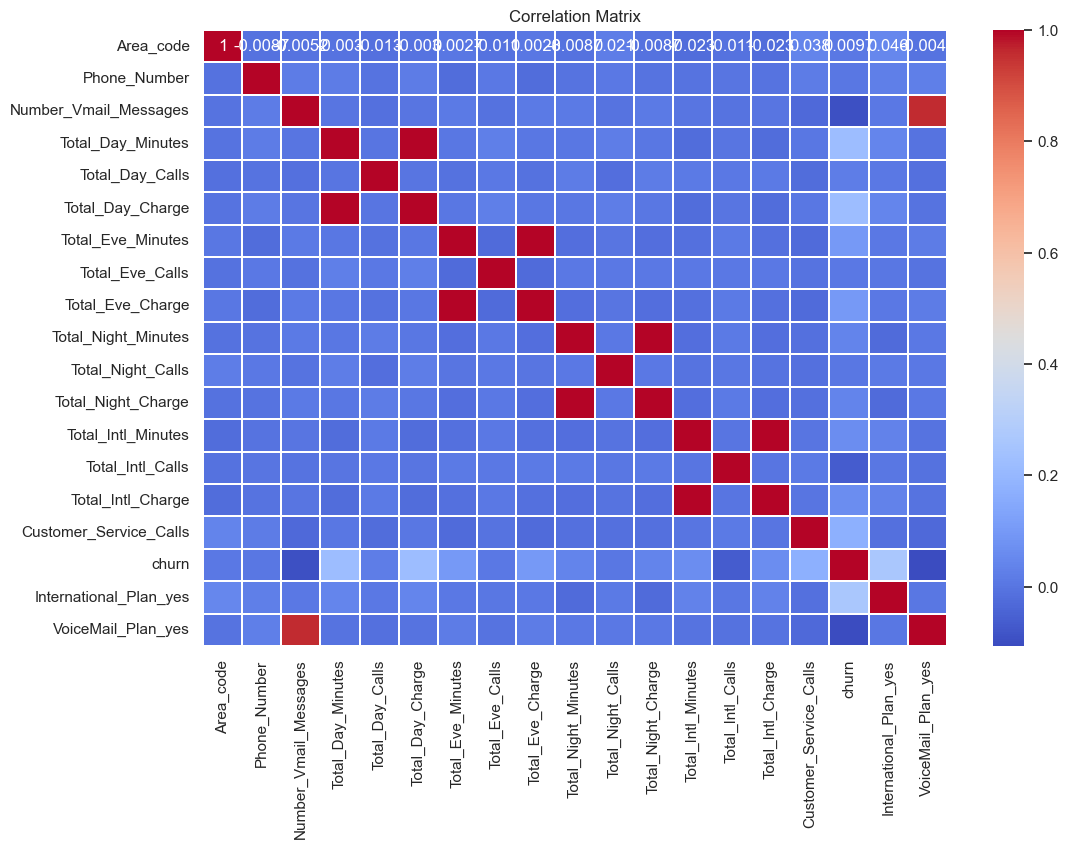

In [ ]:
#cORRELATION mATRIX
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.2)
plt.title('Correlation Matrix')
plt.show()

__Plot numerical Variables against Churn__

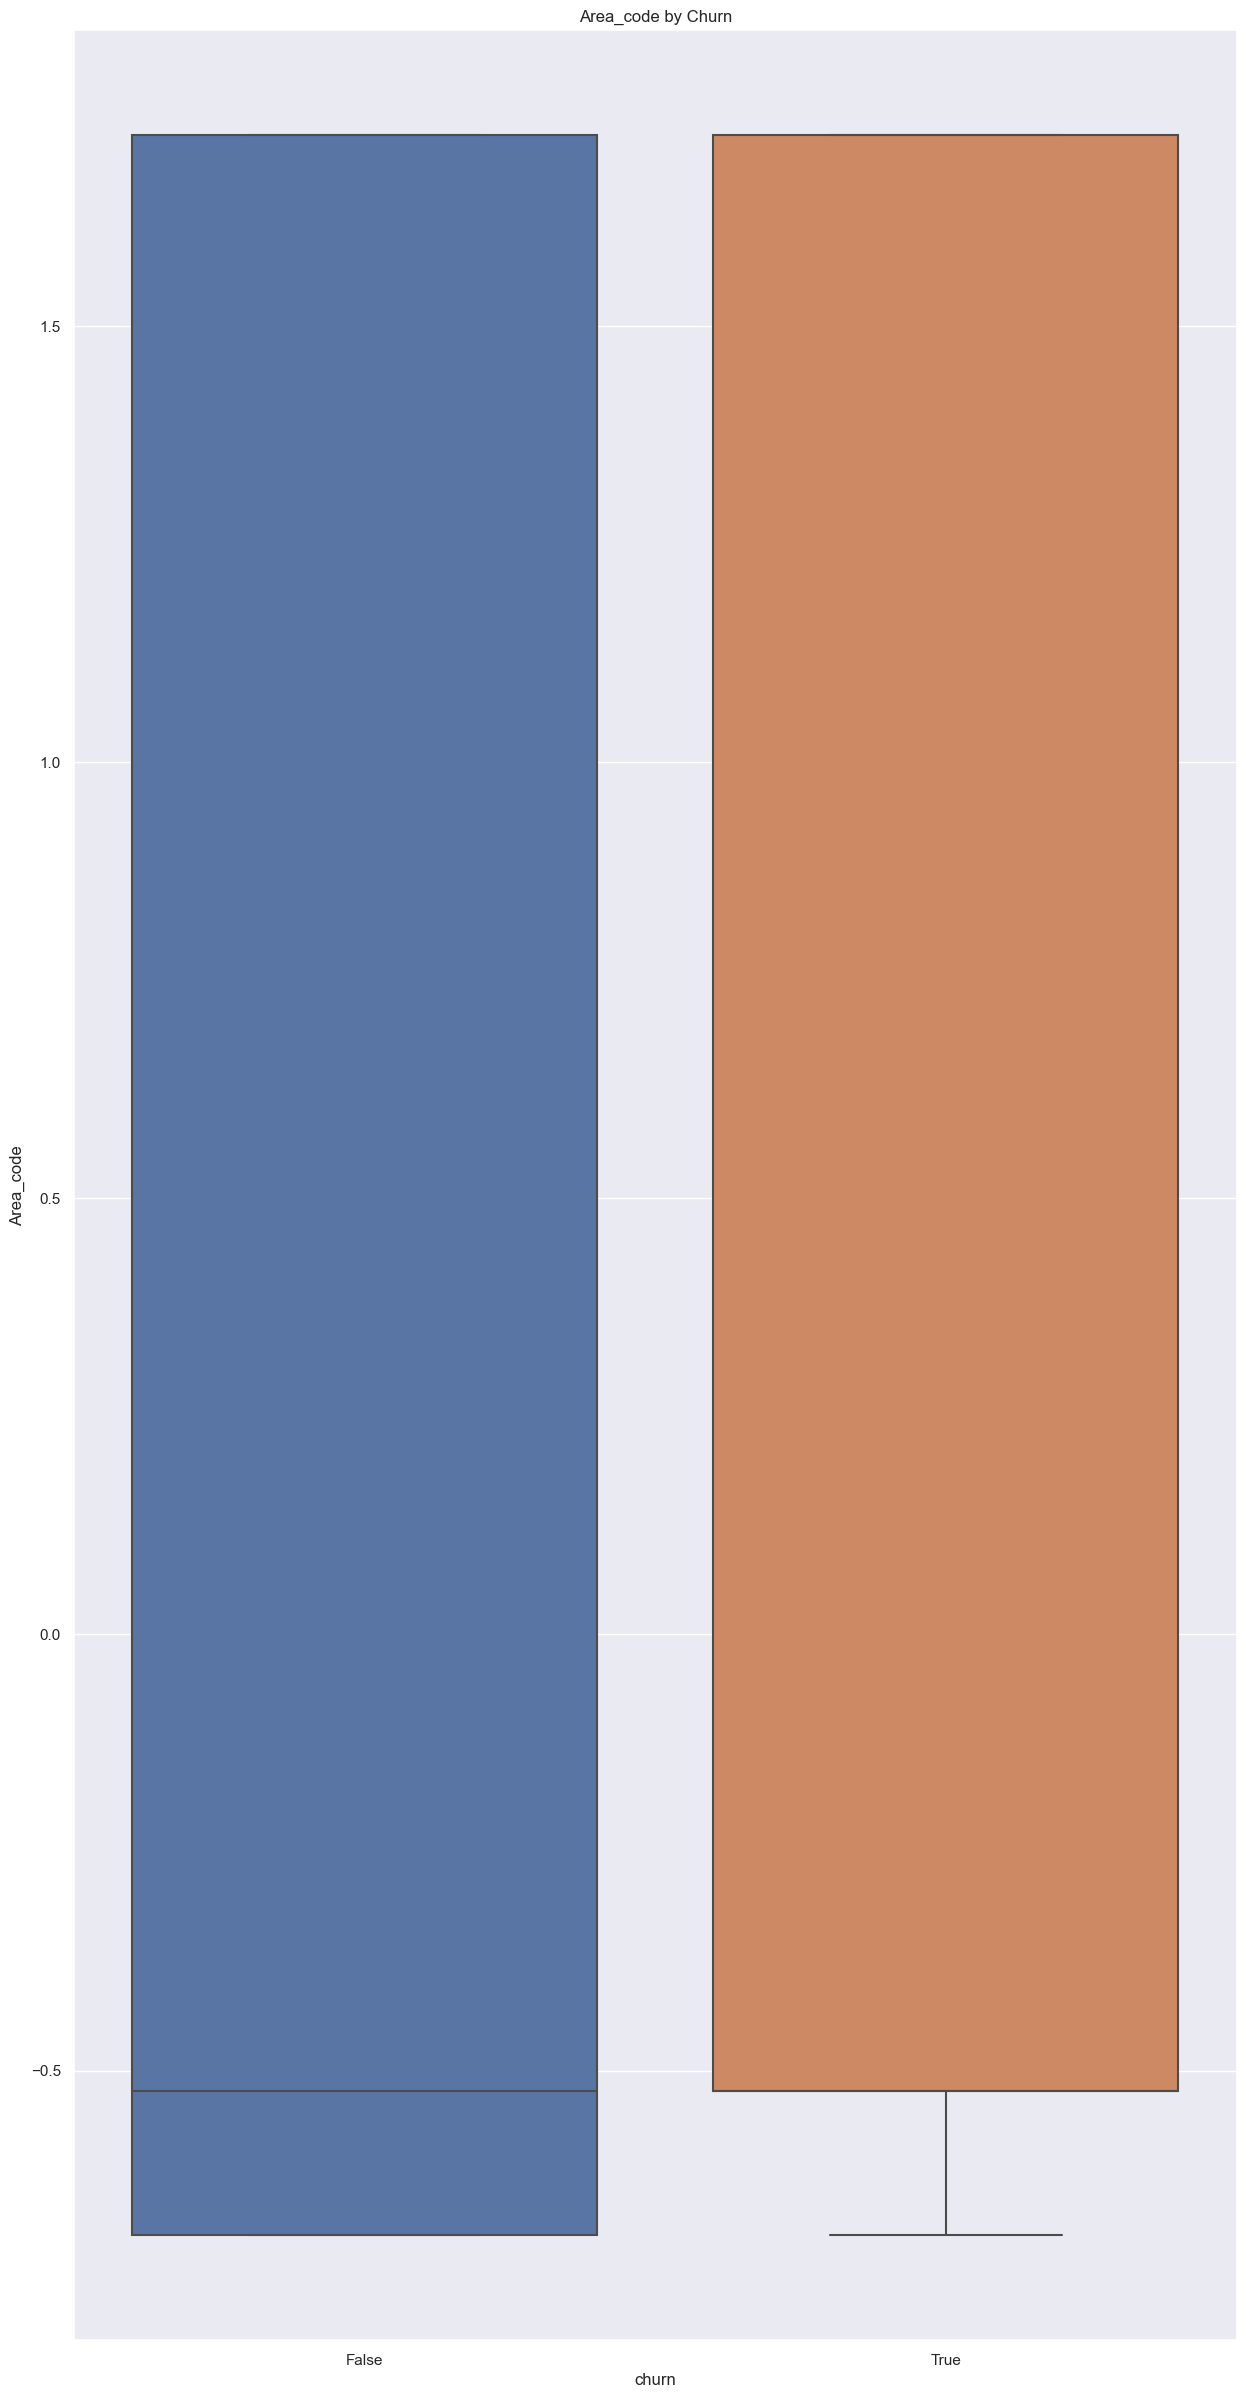

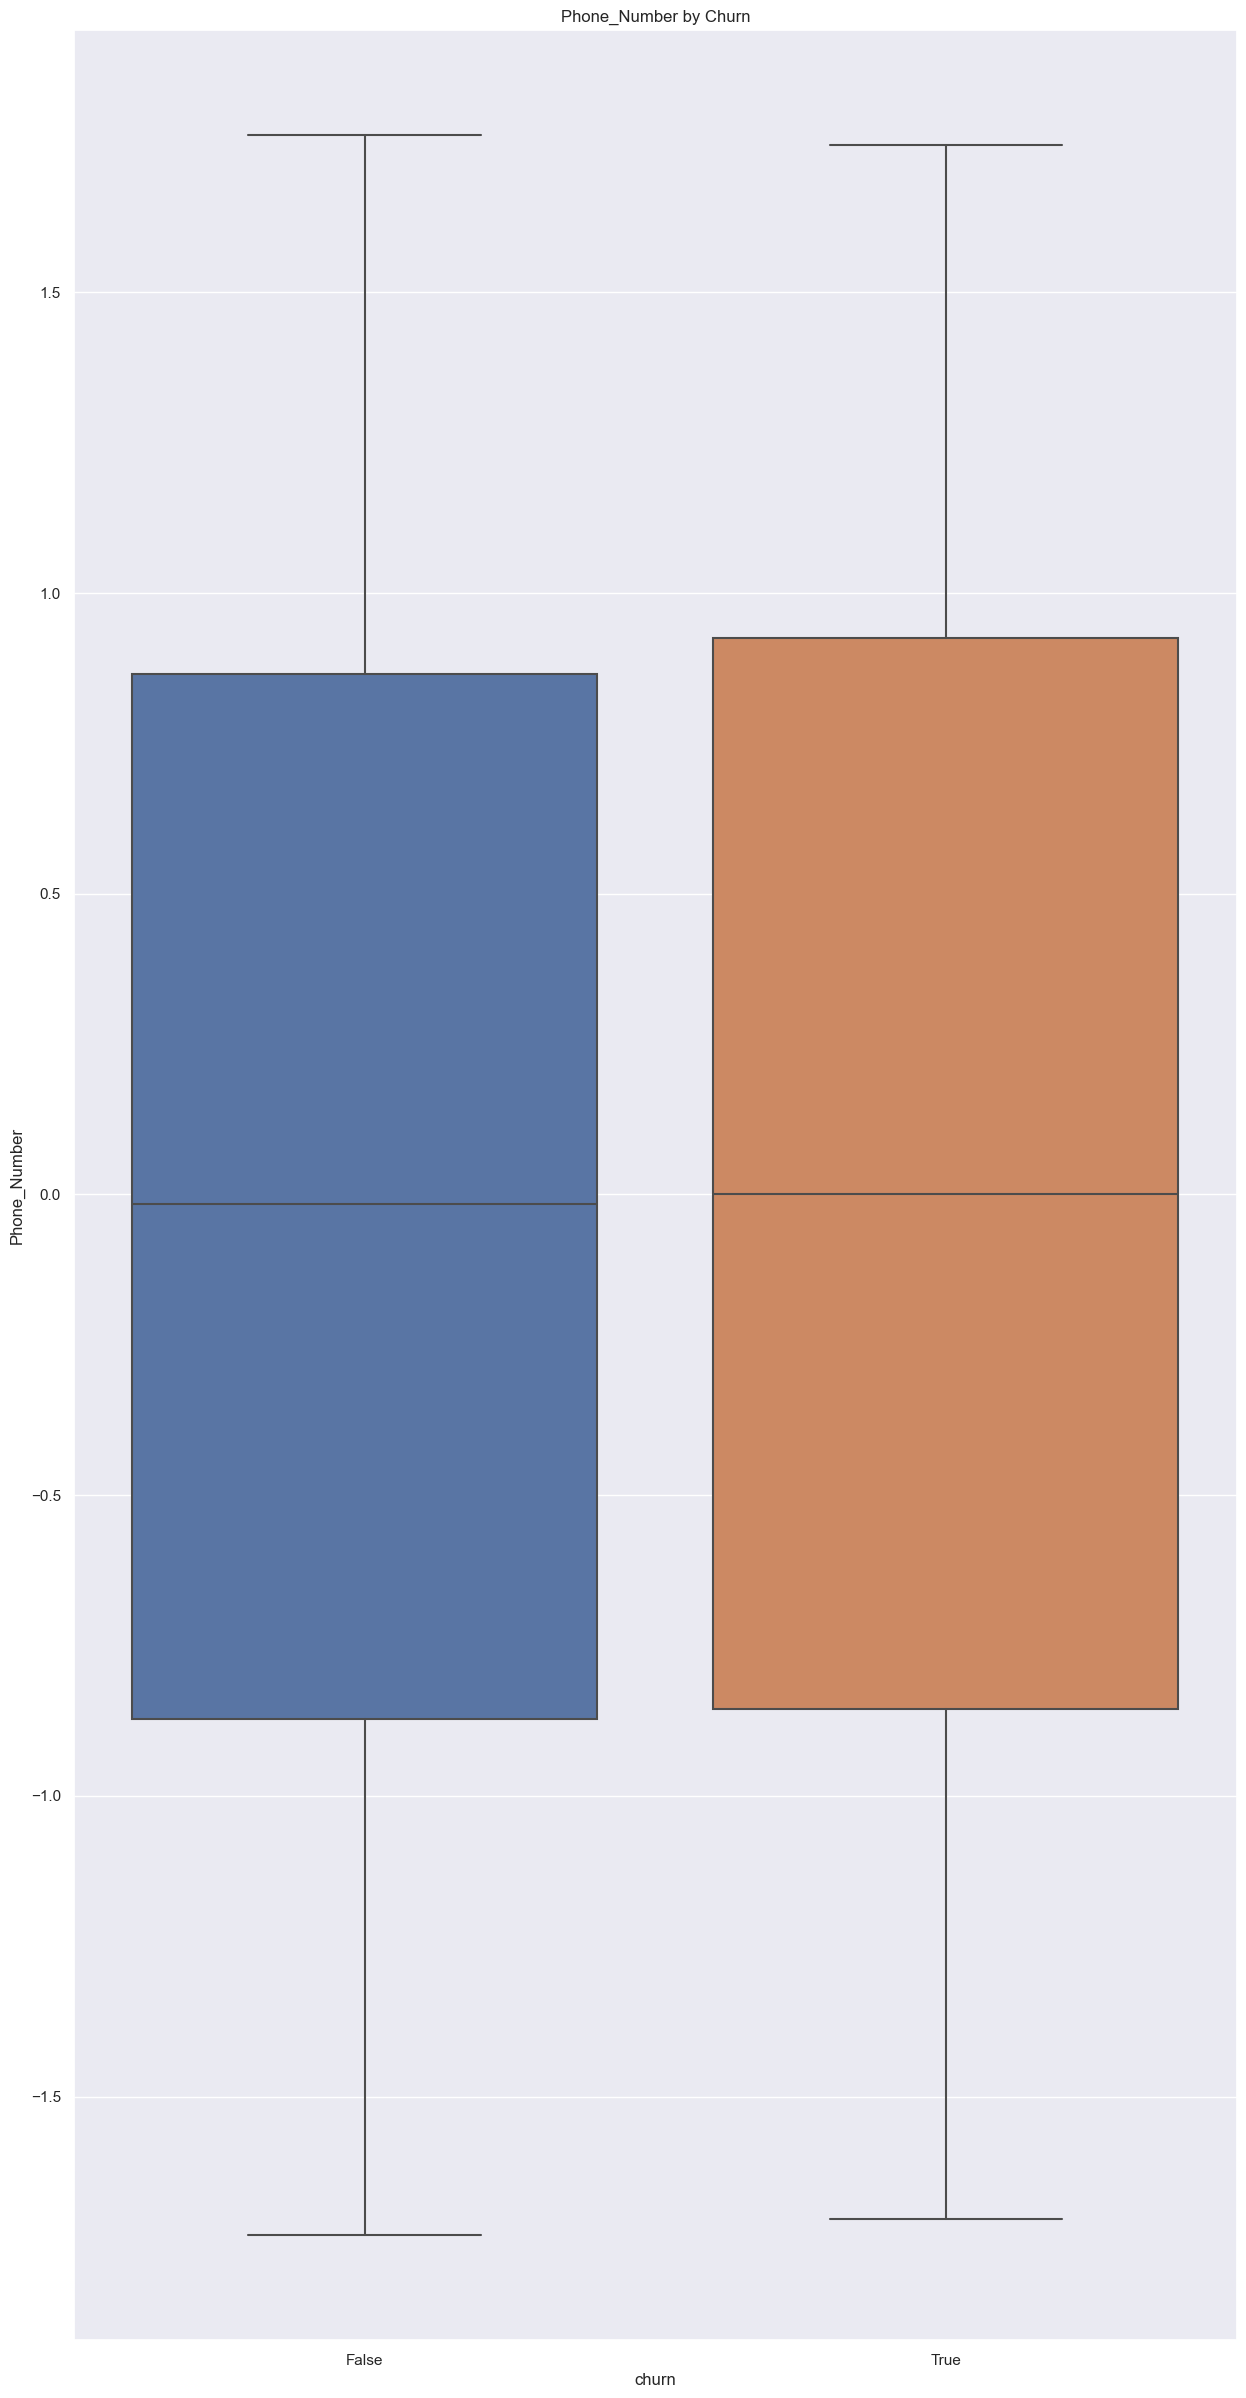

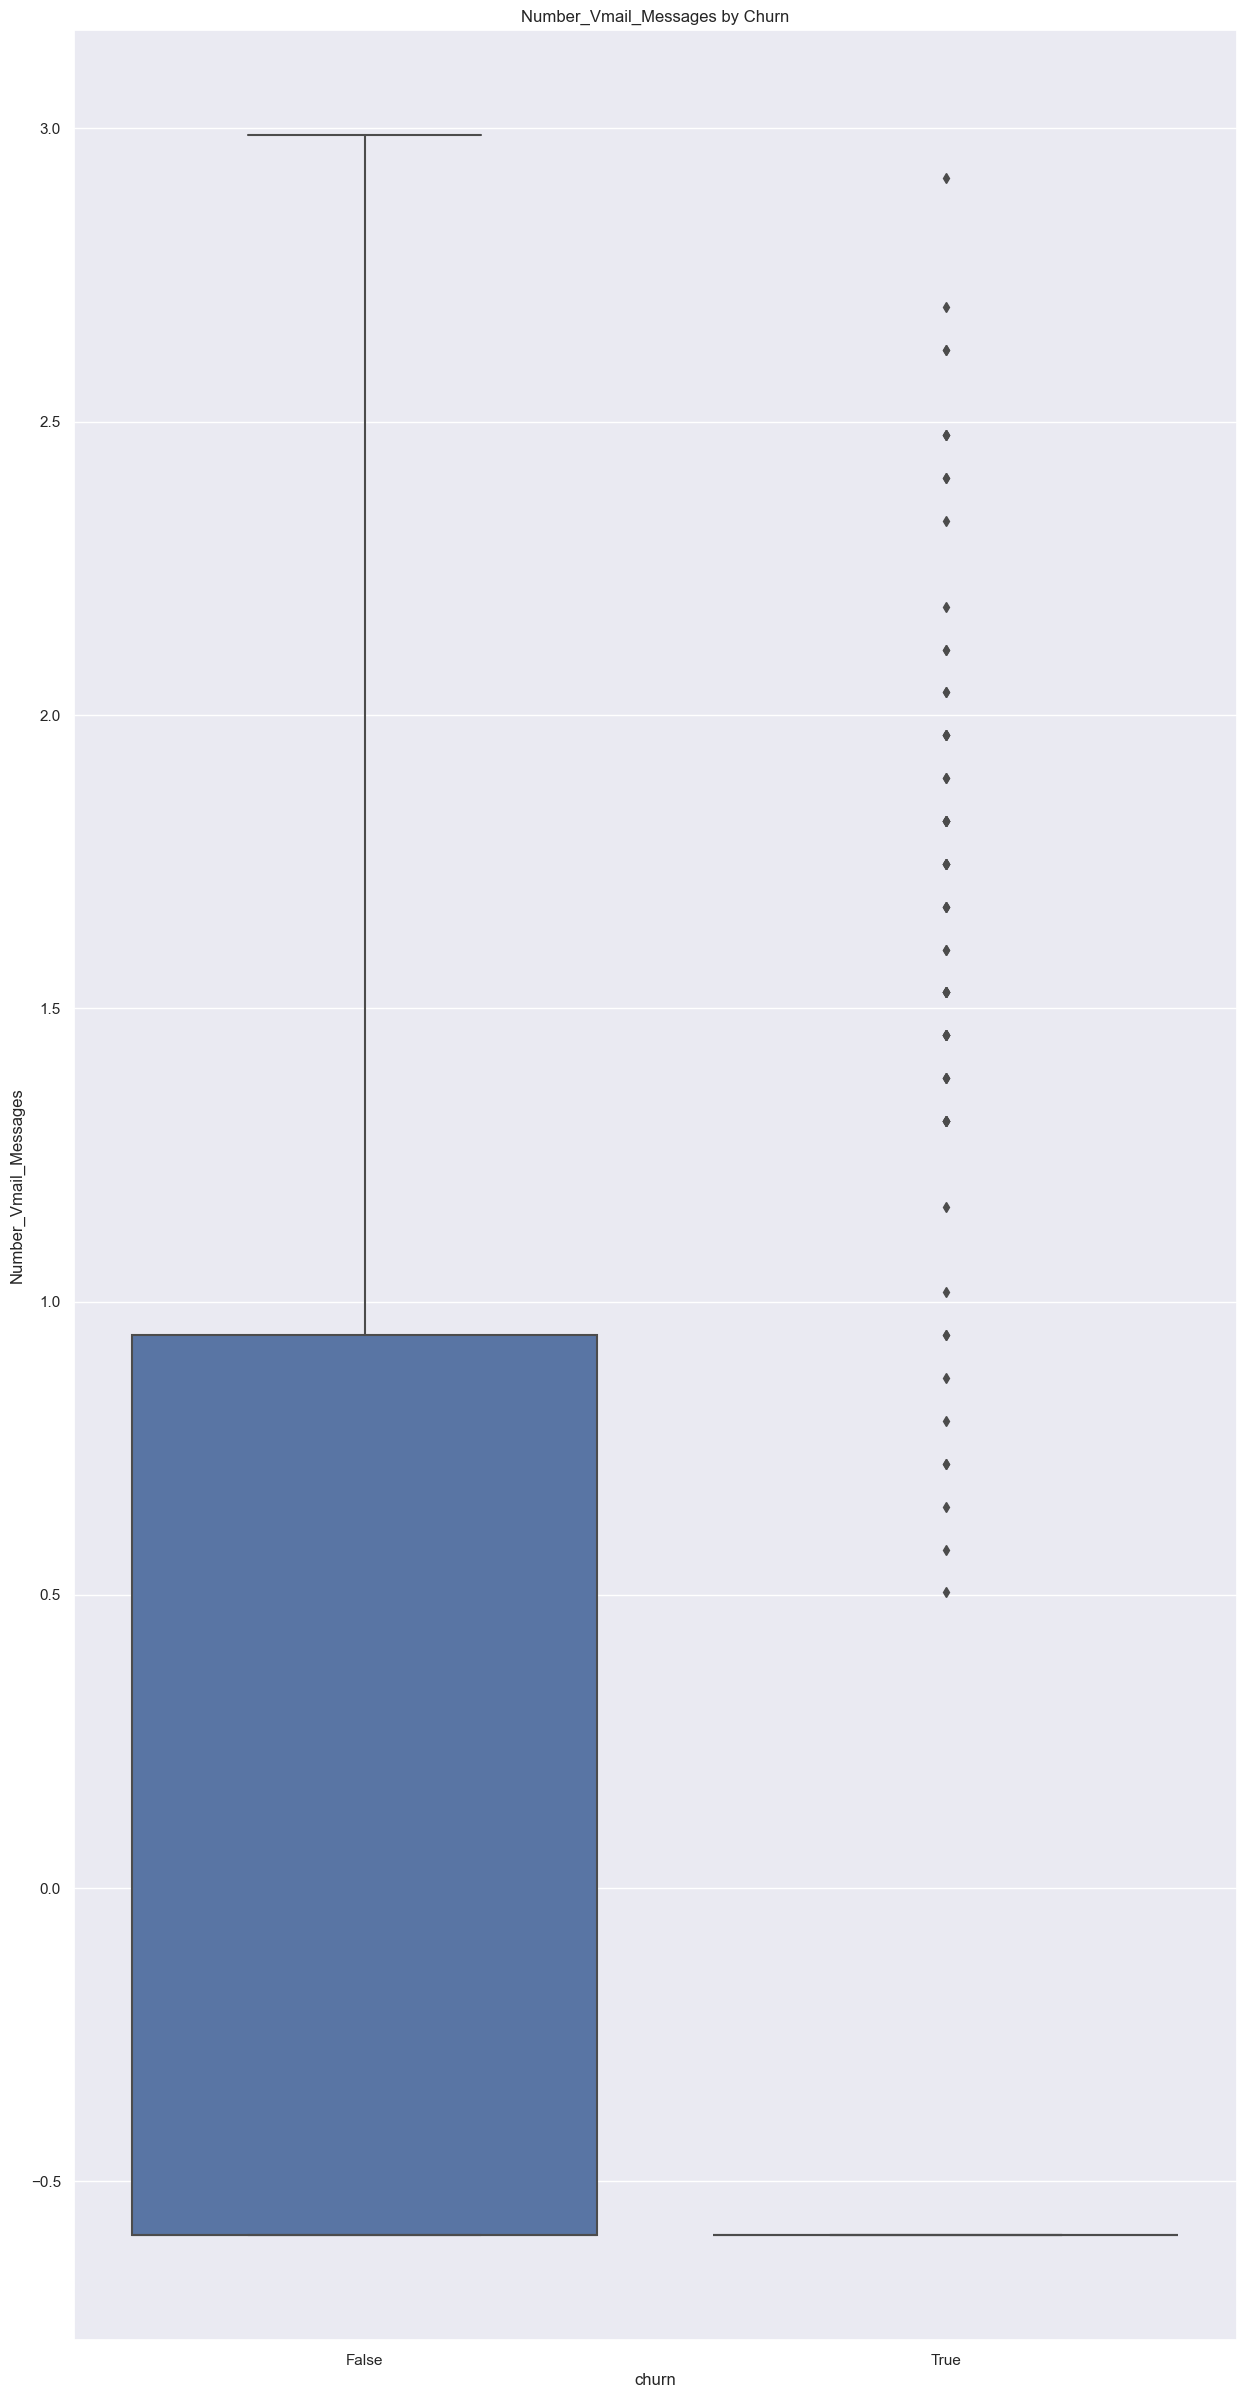

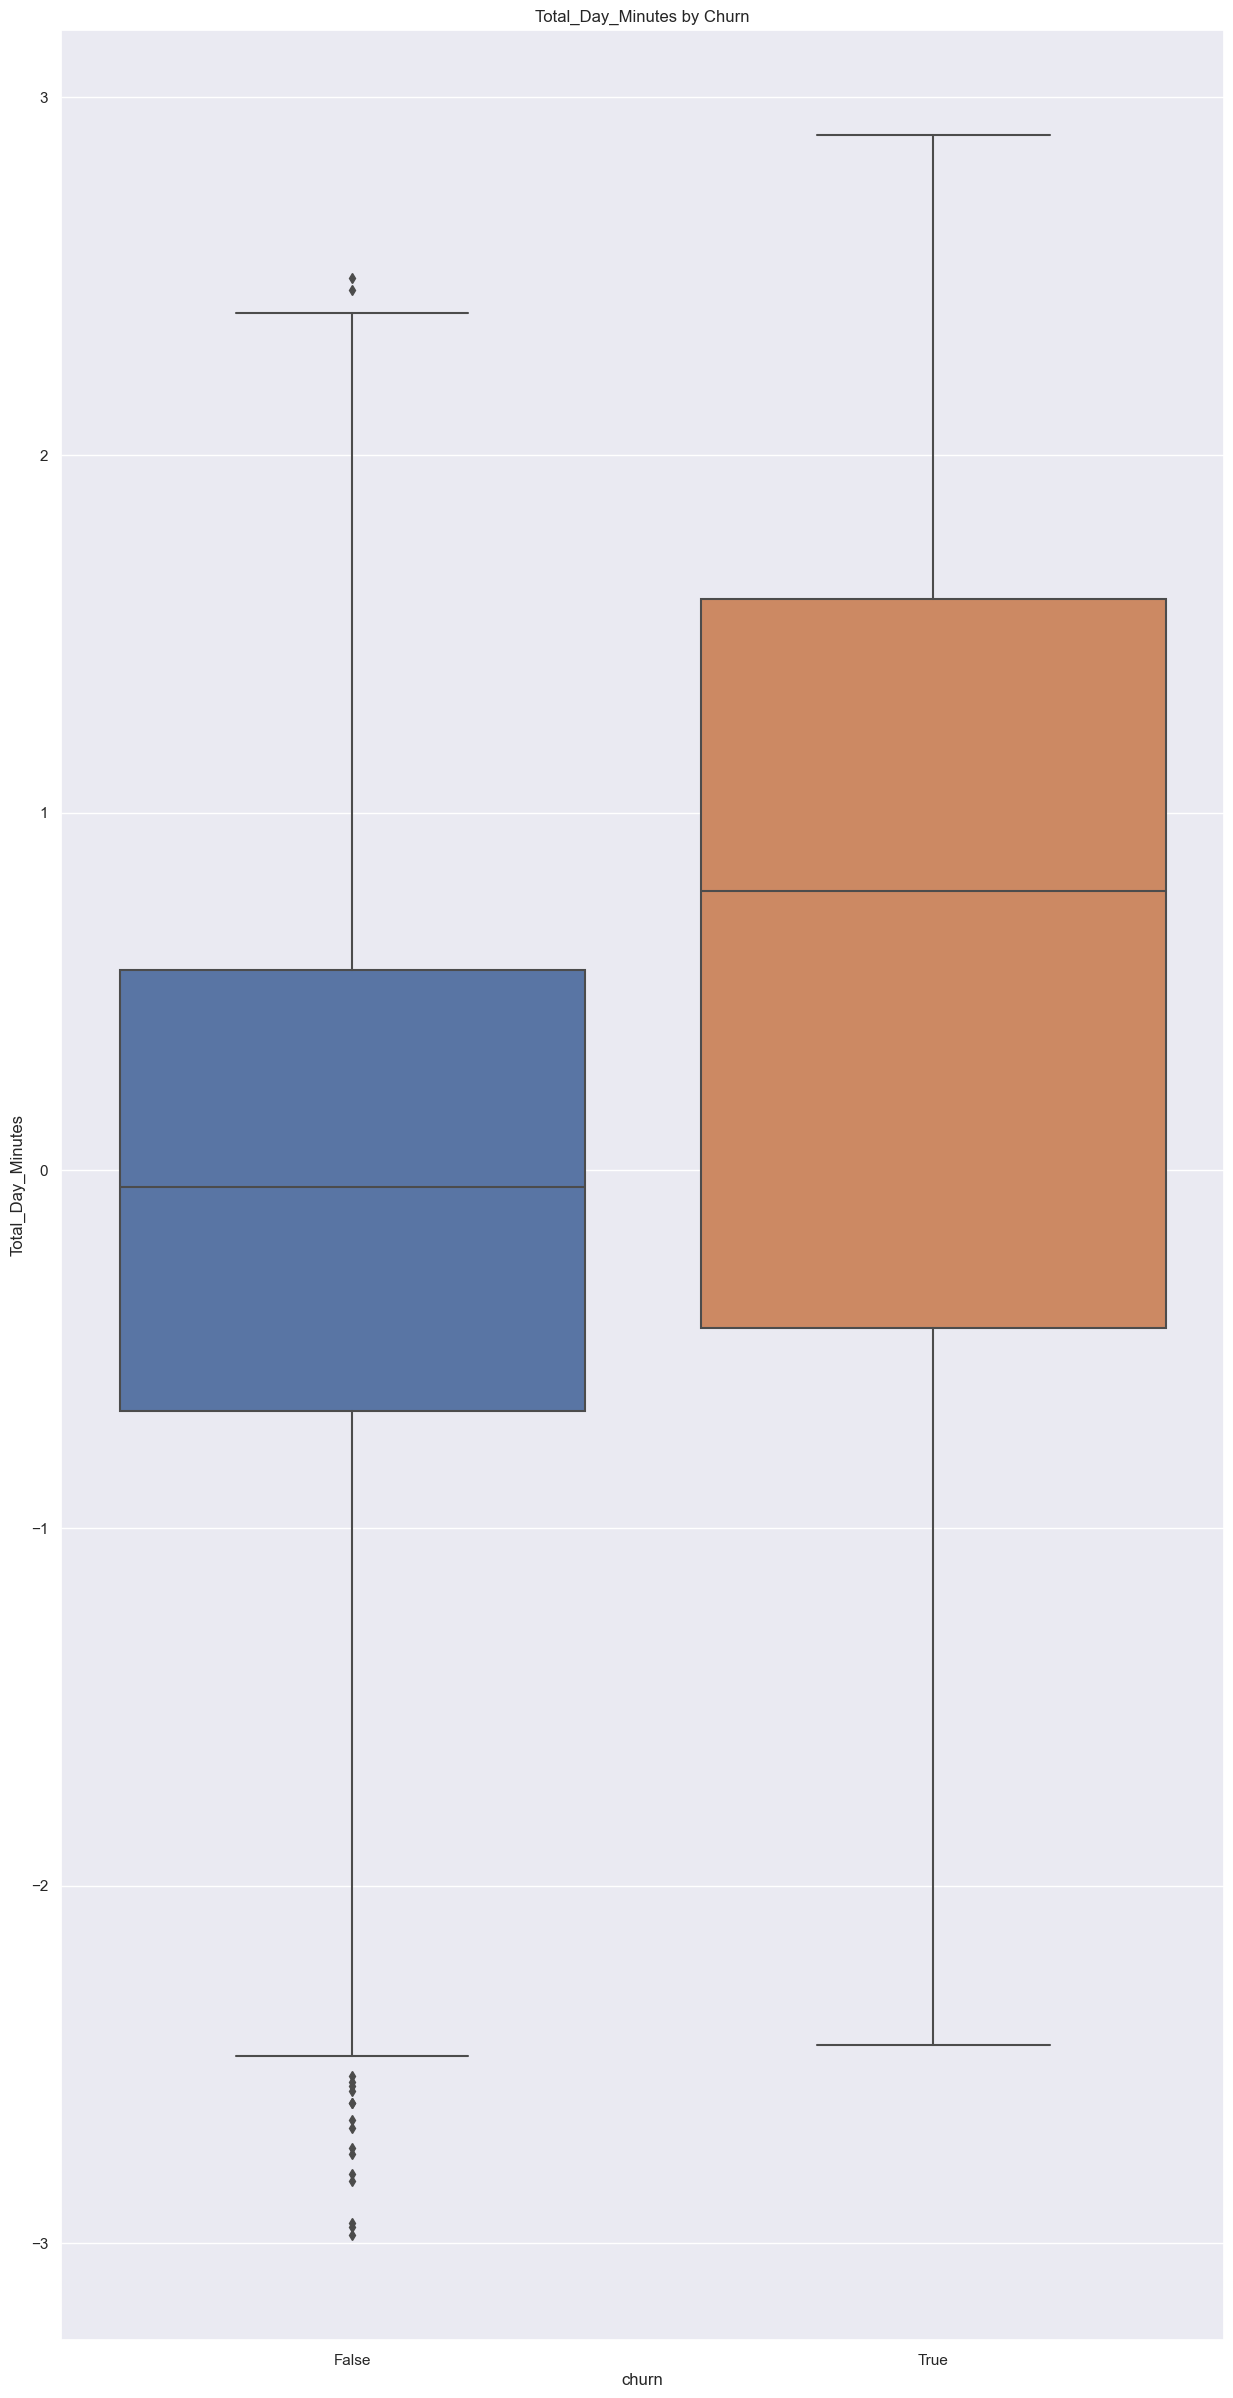

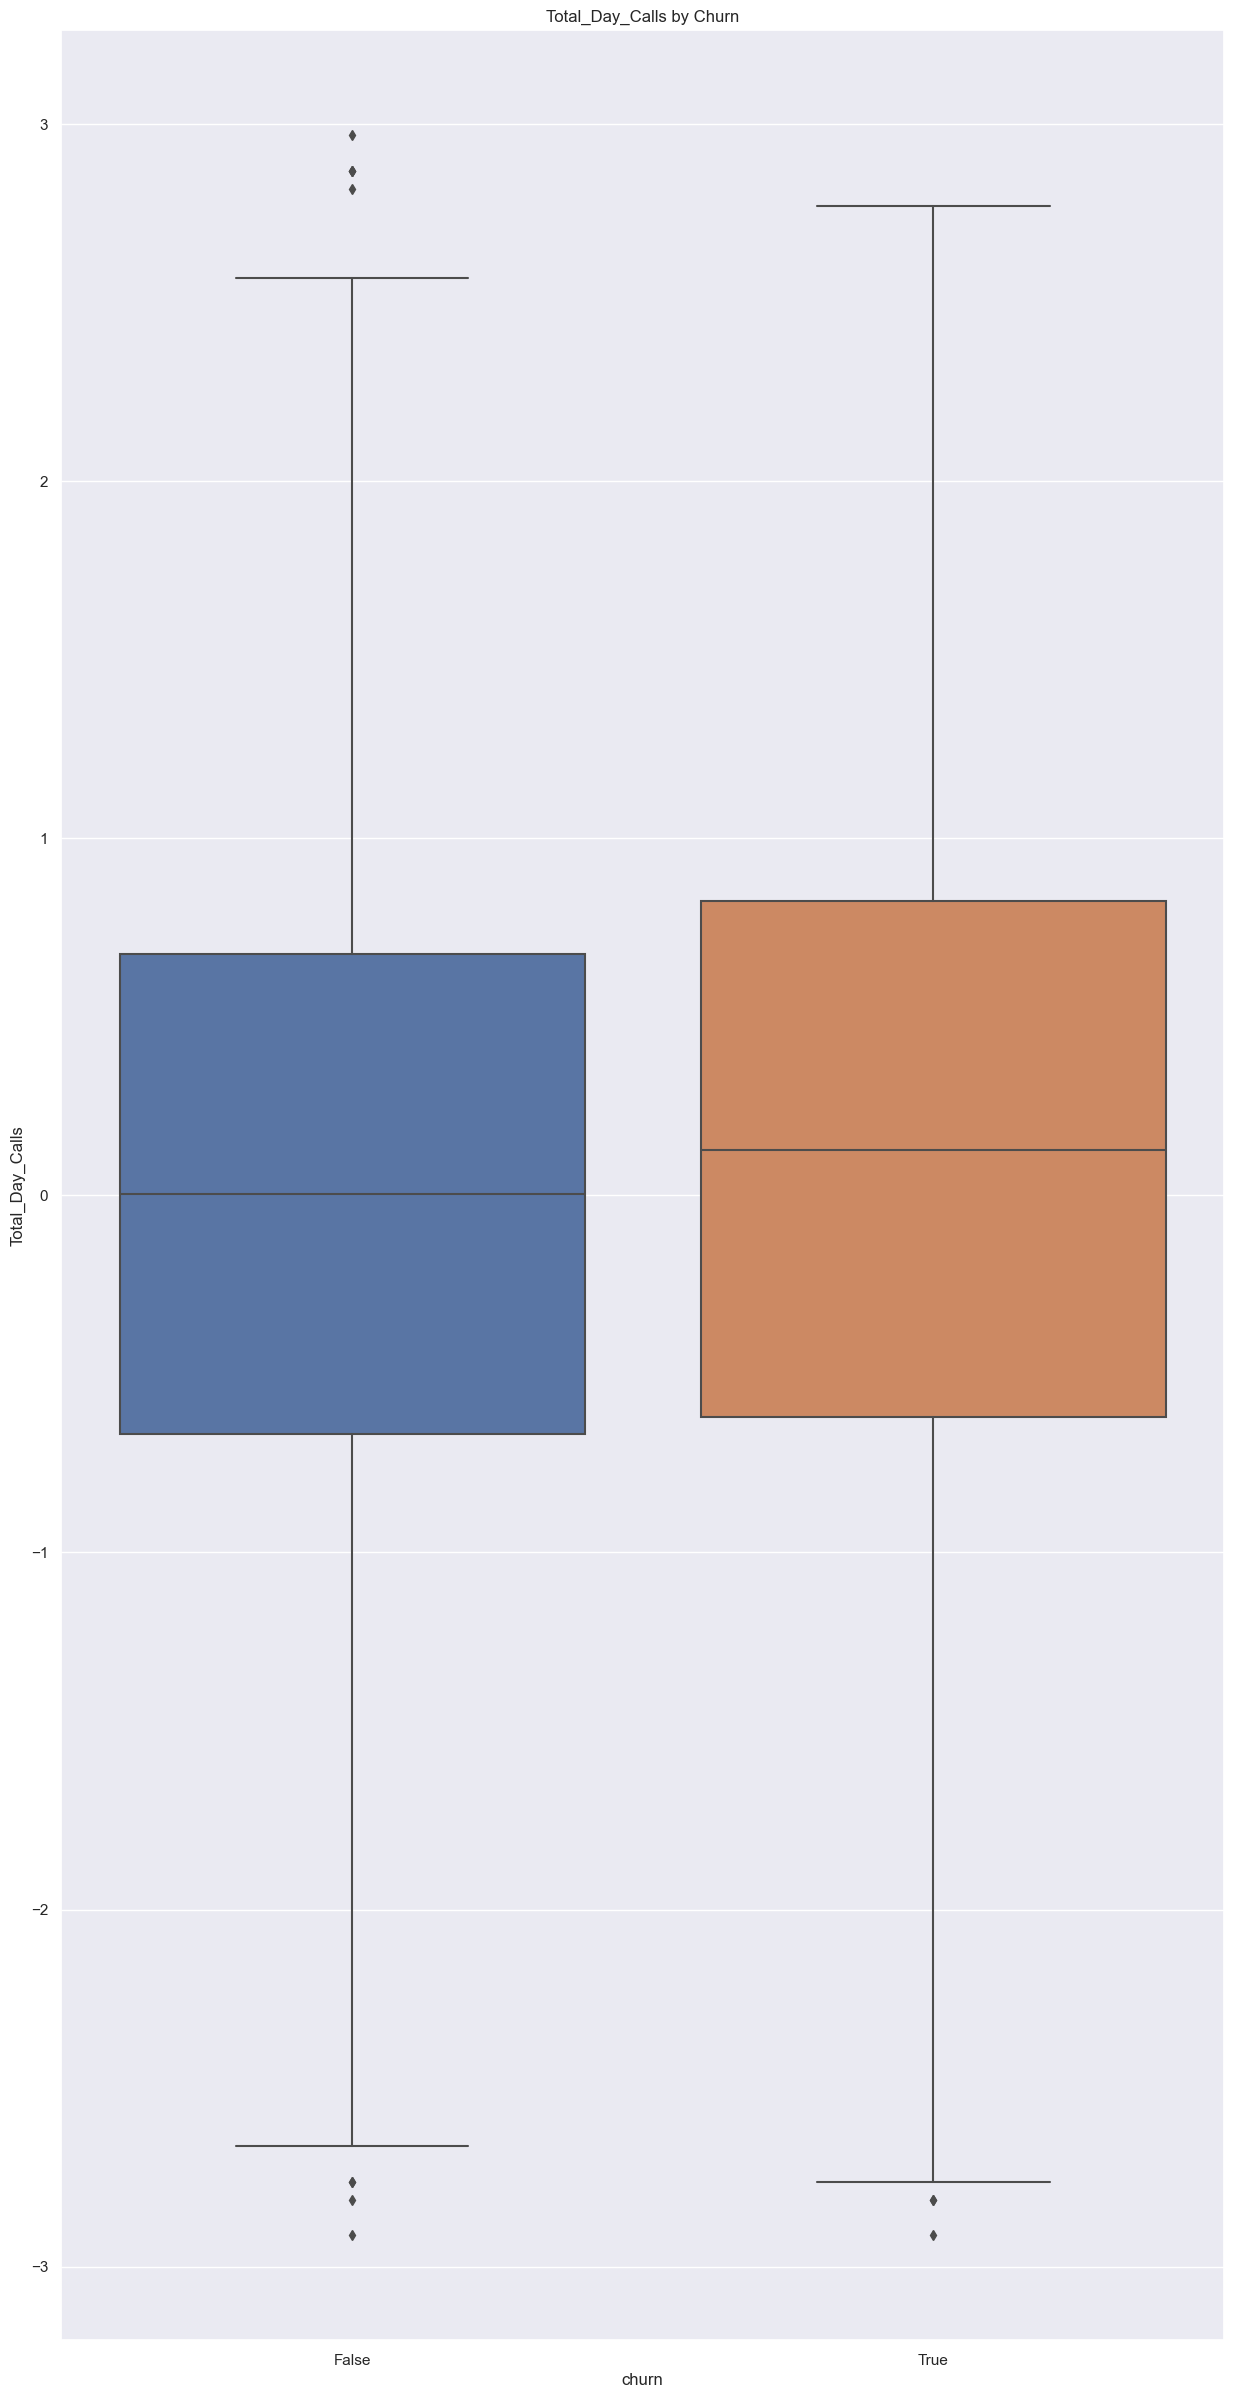

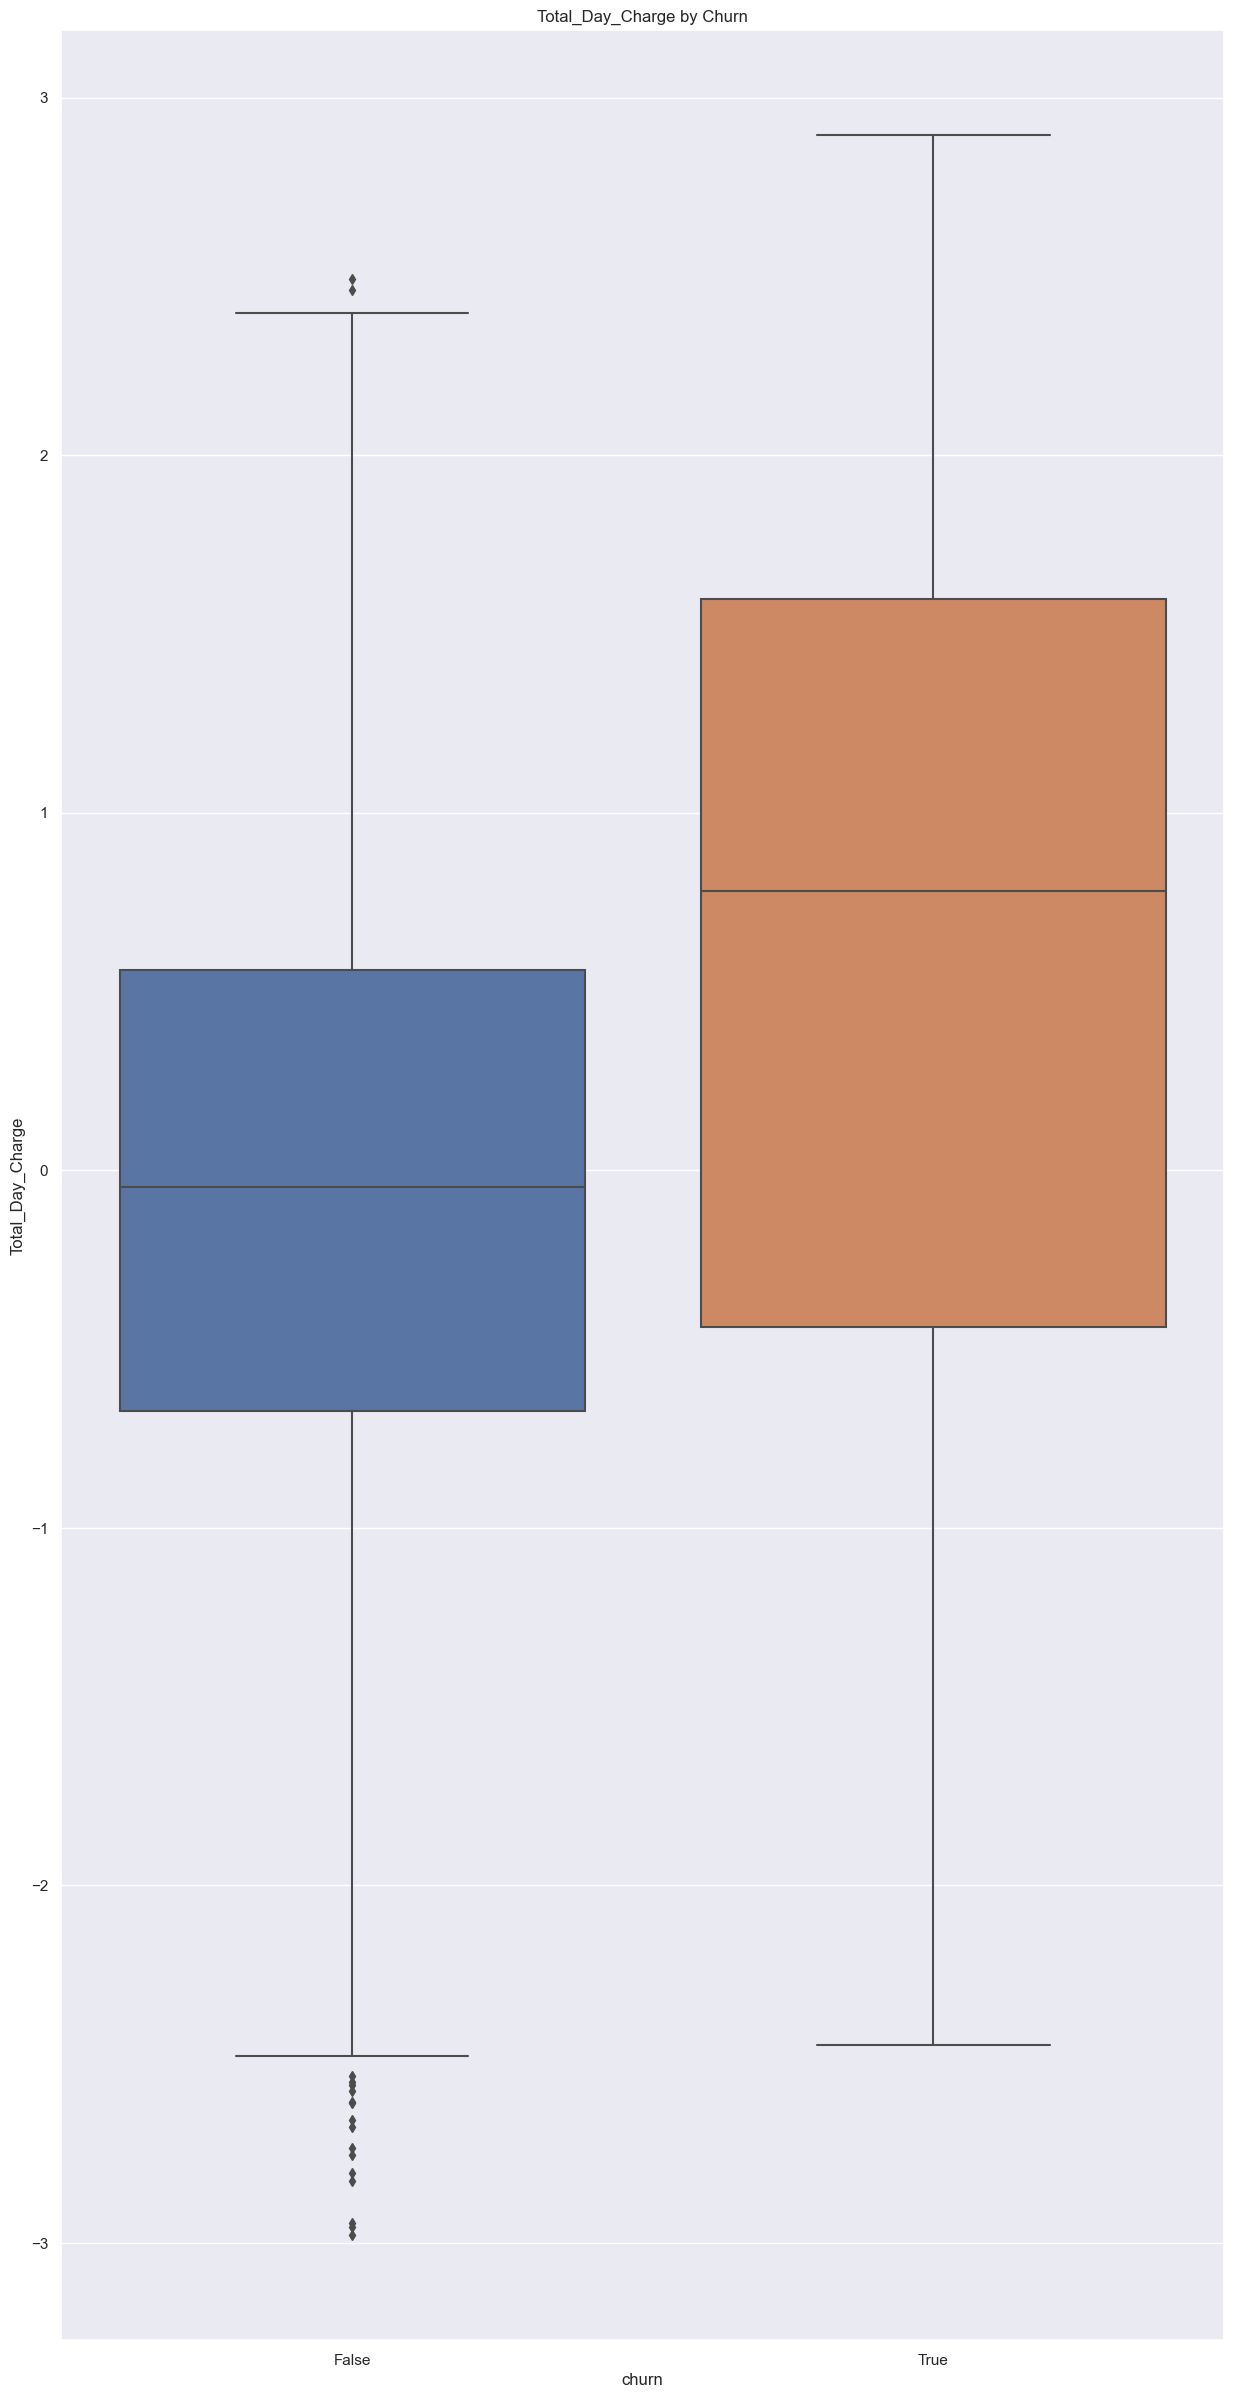

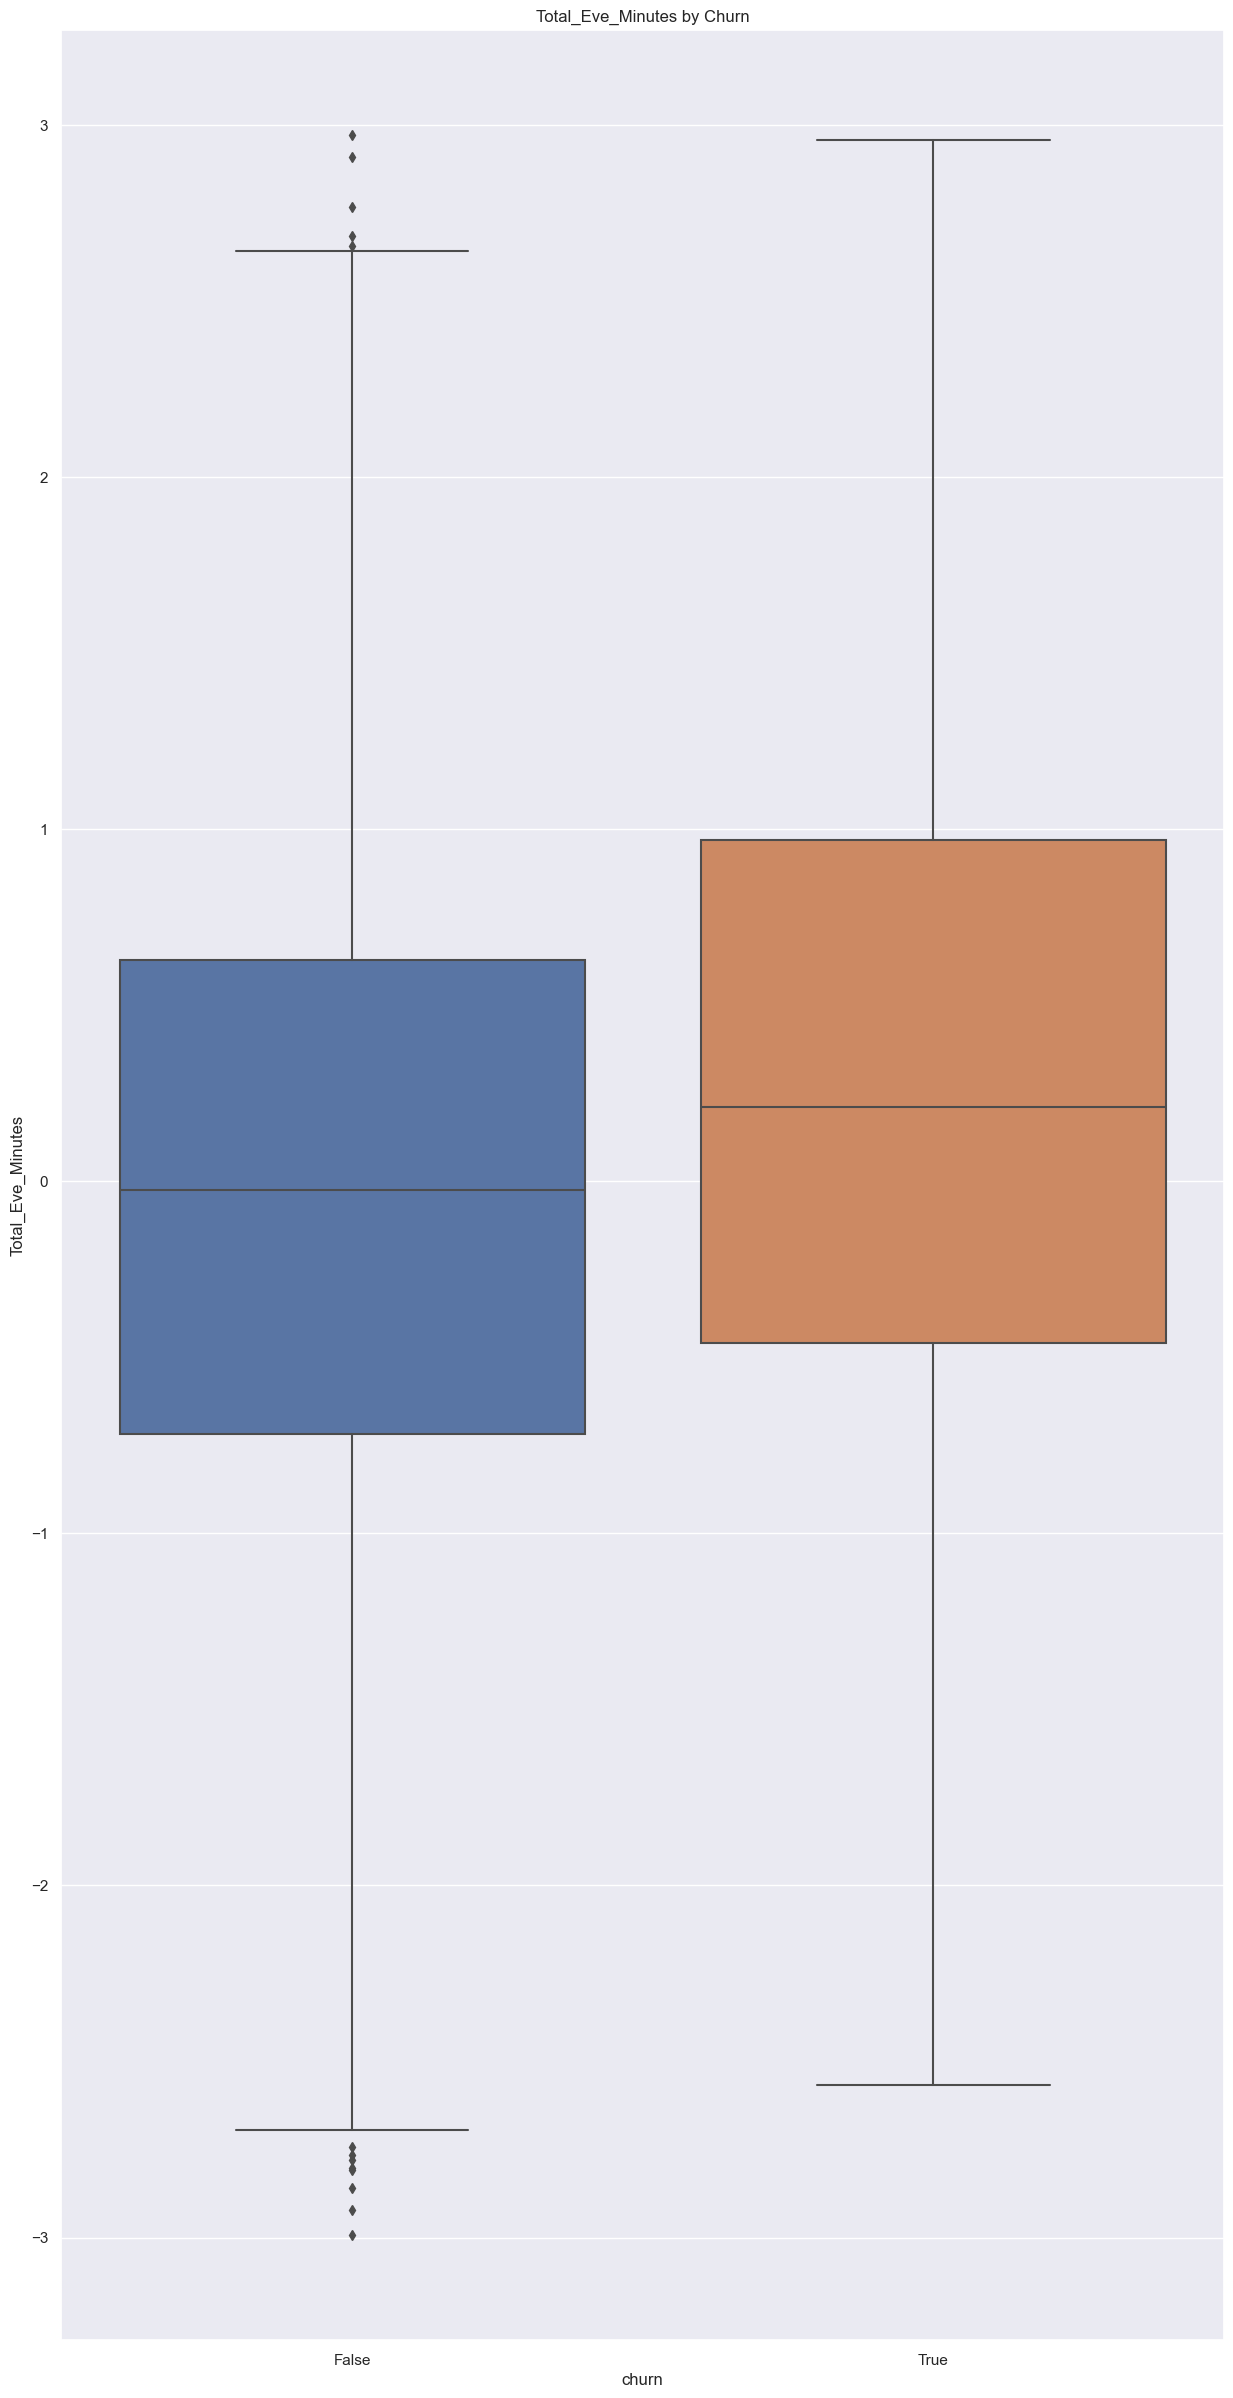

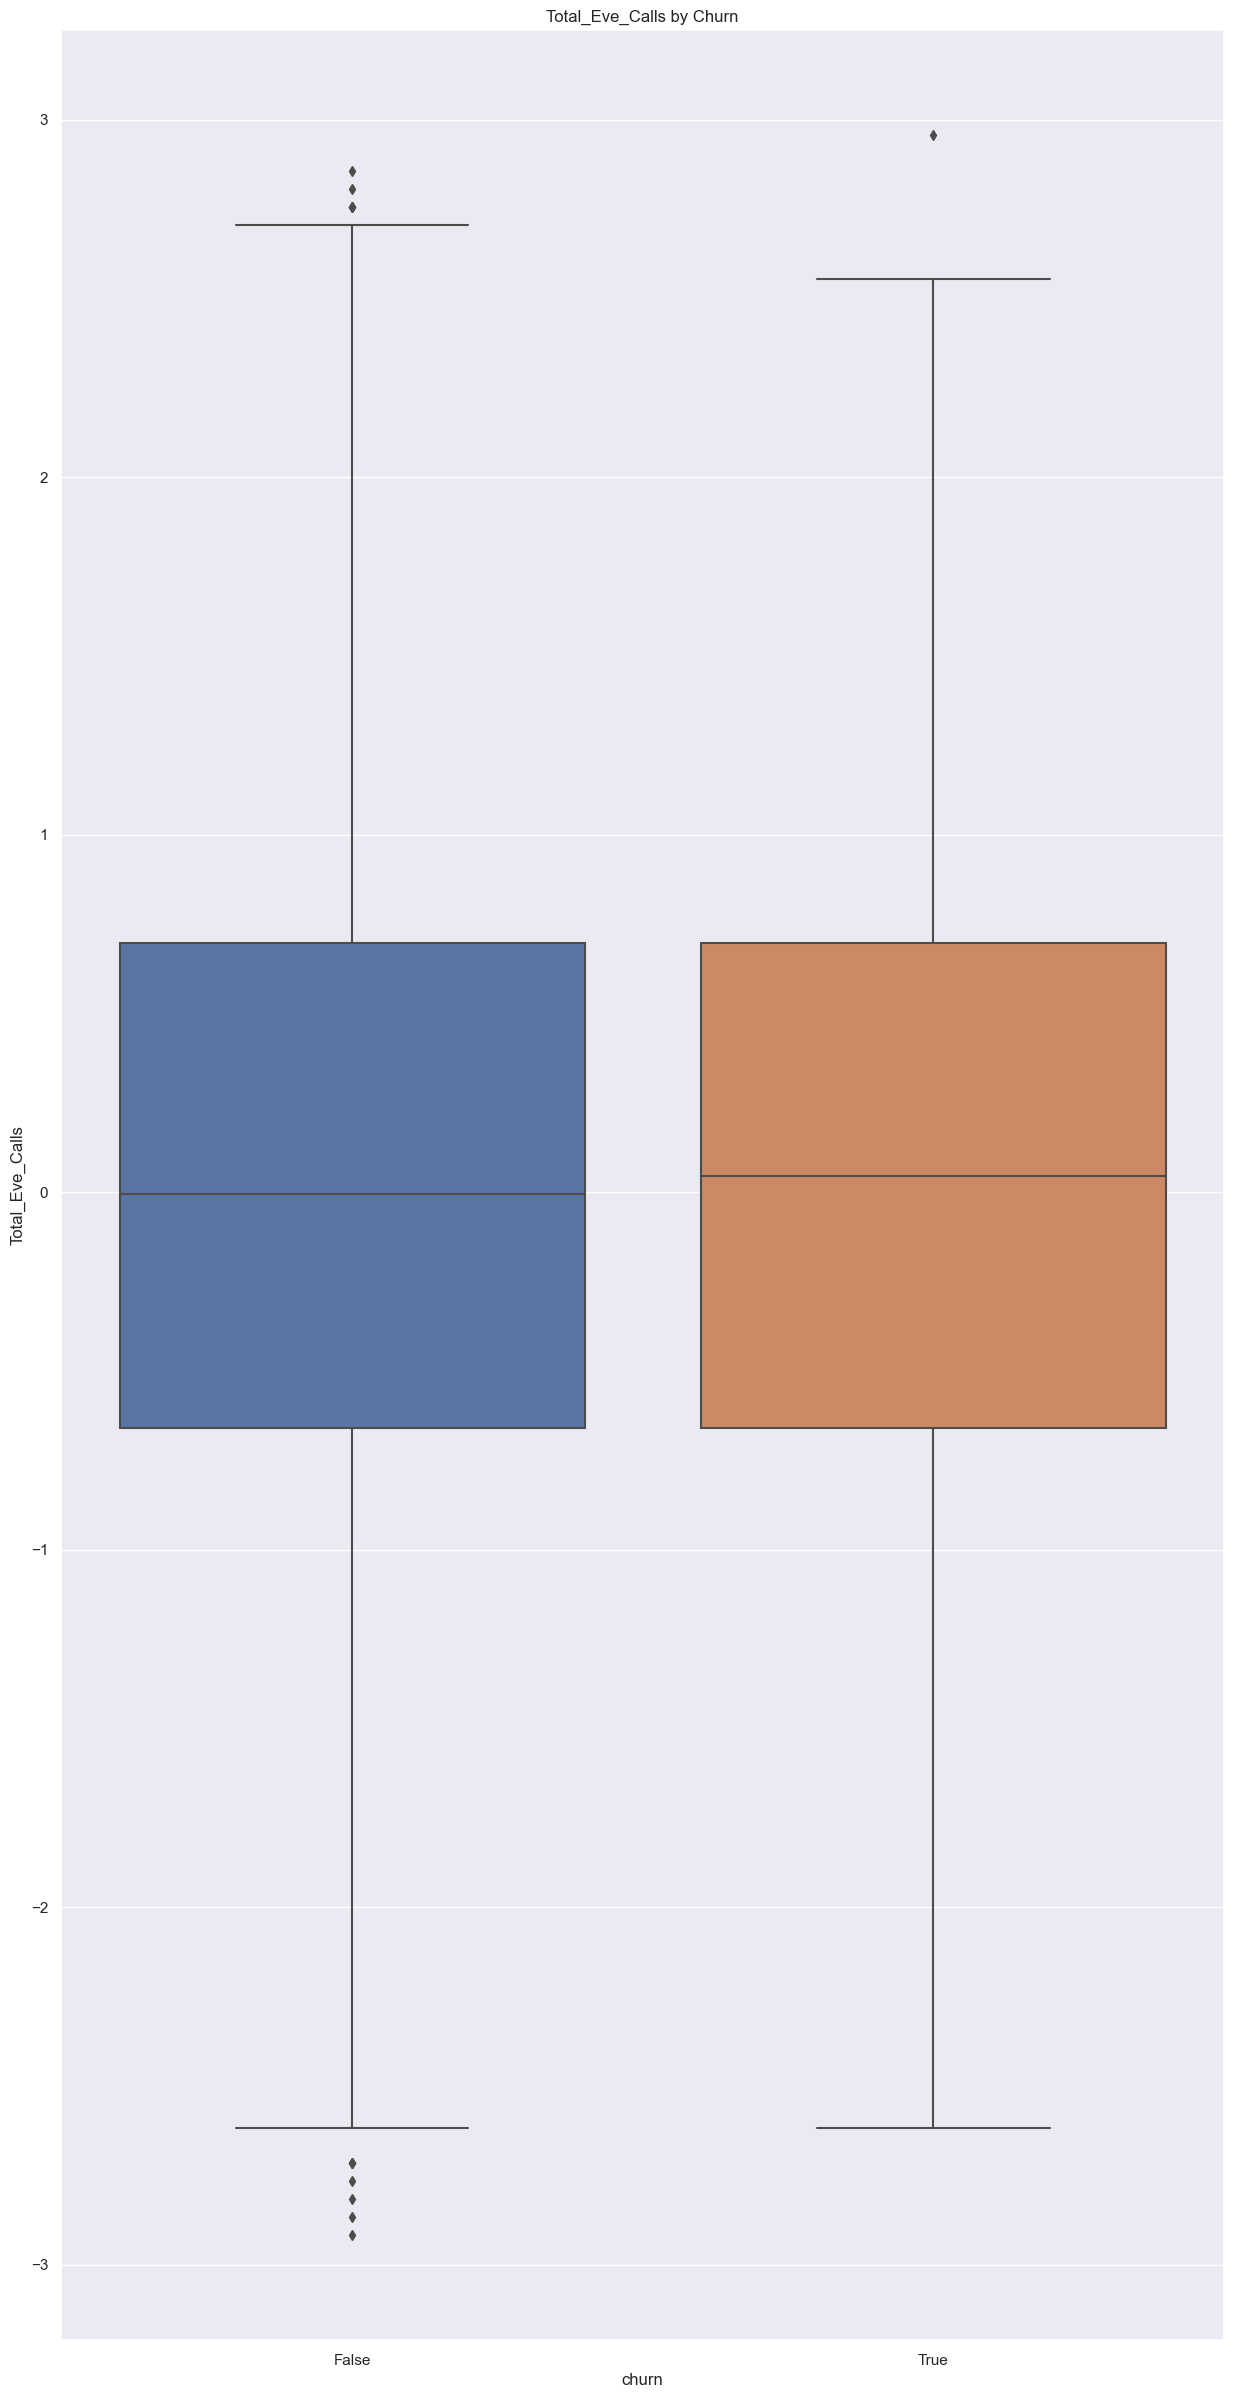

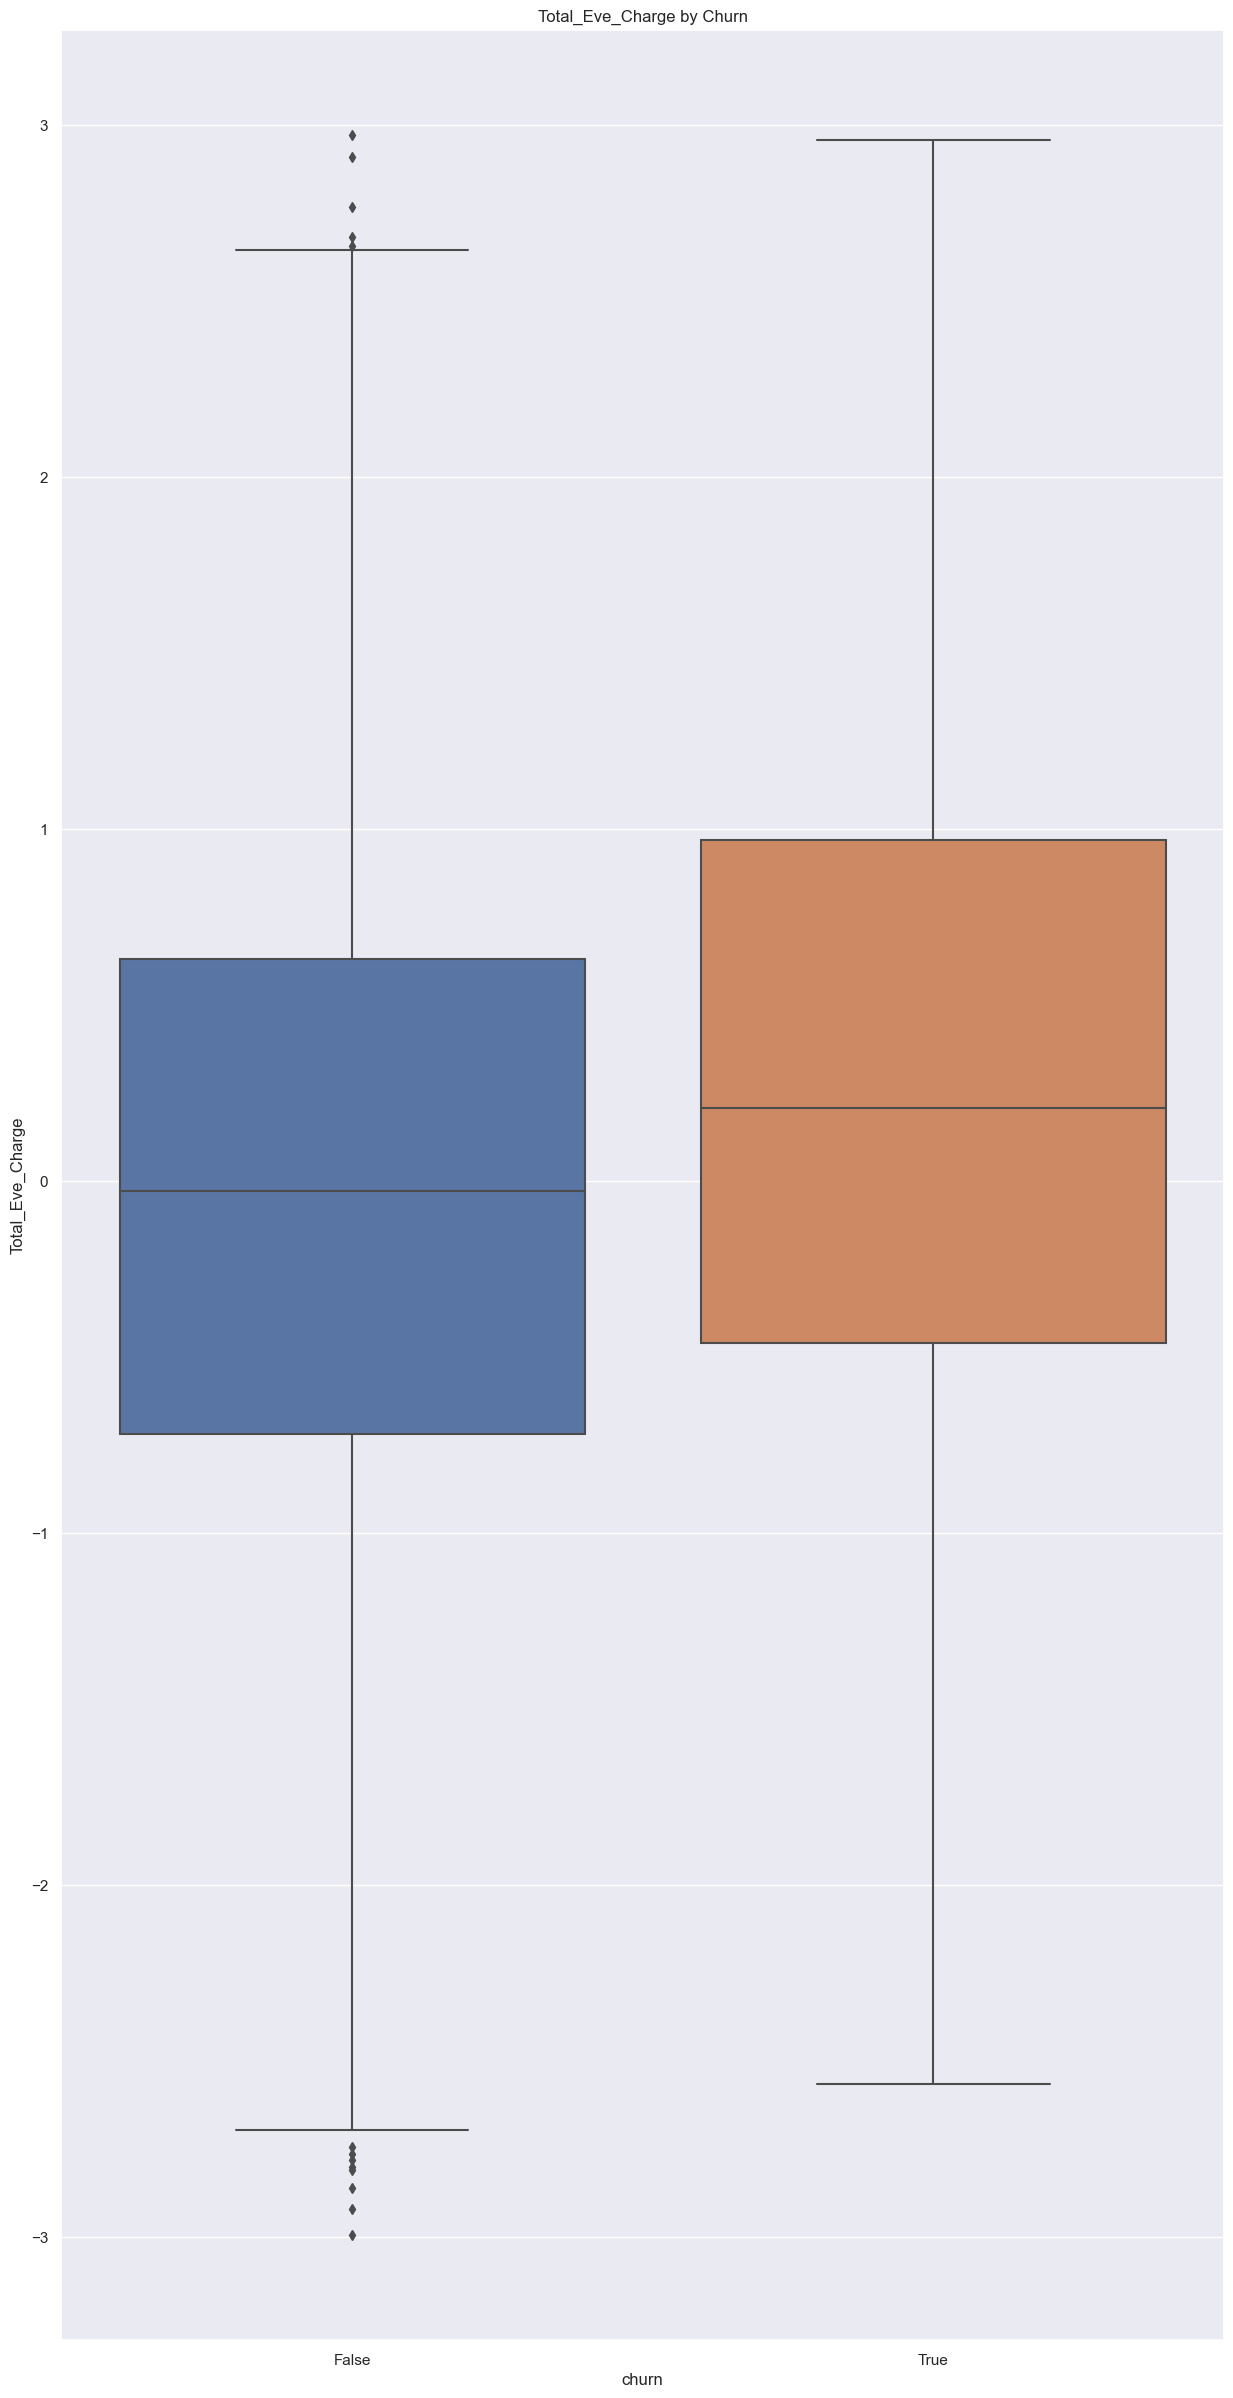

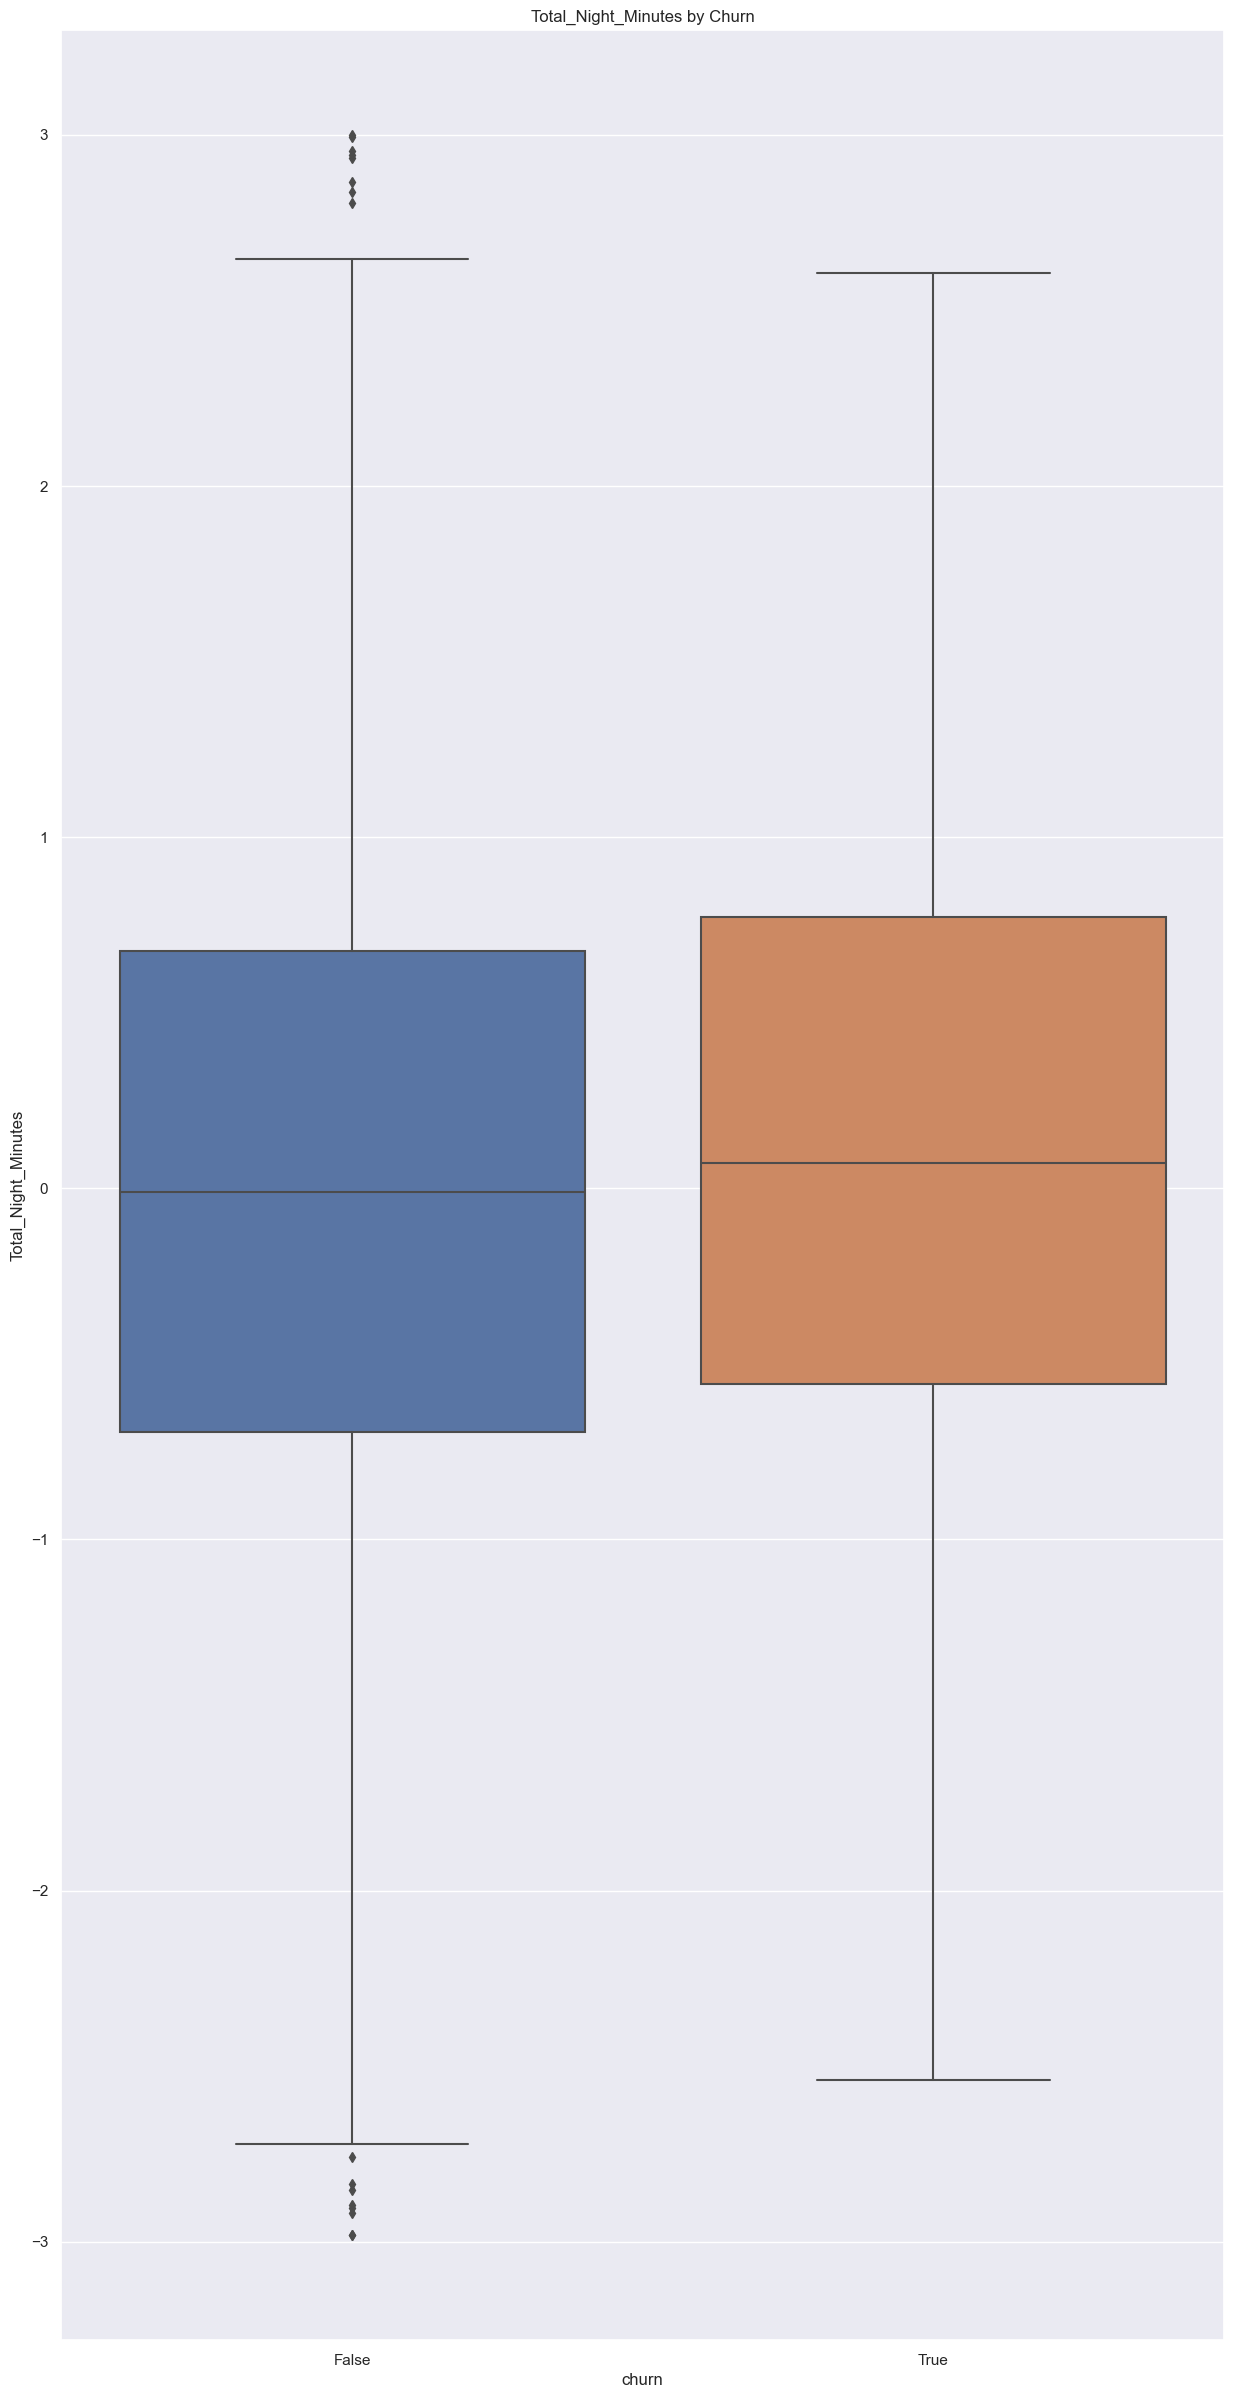

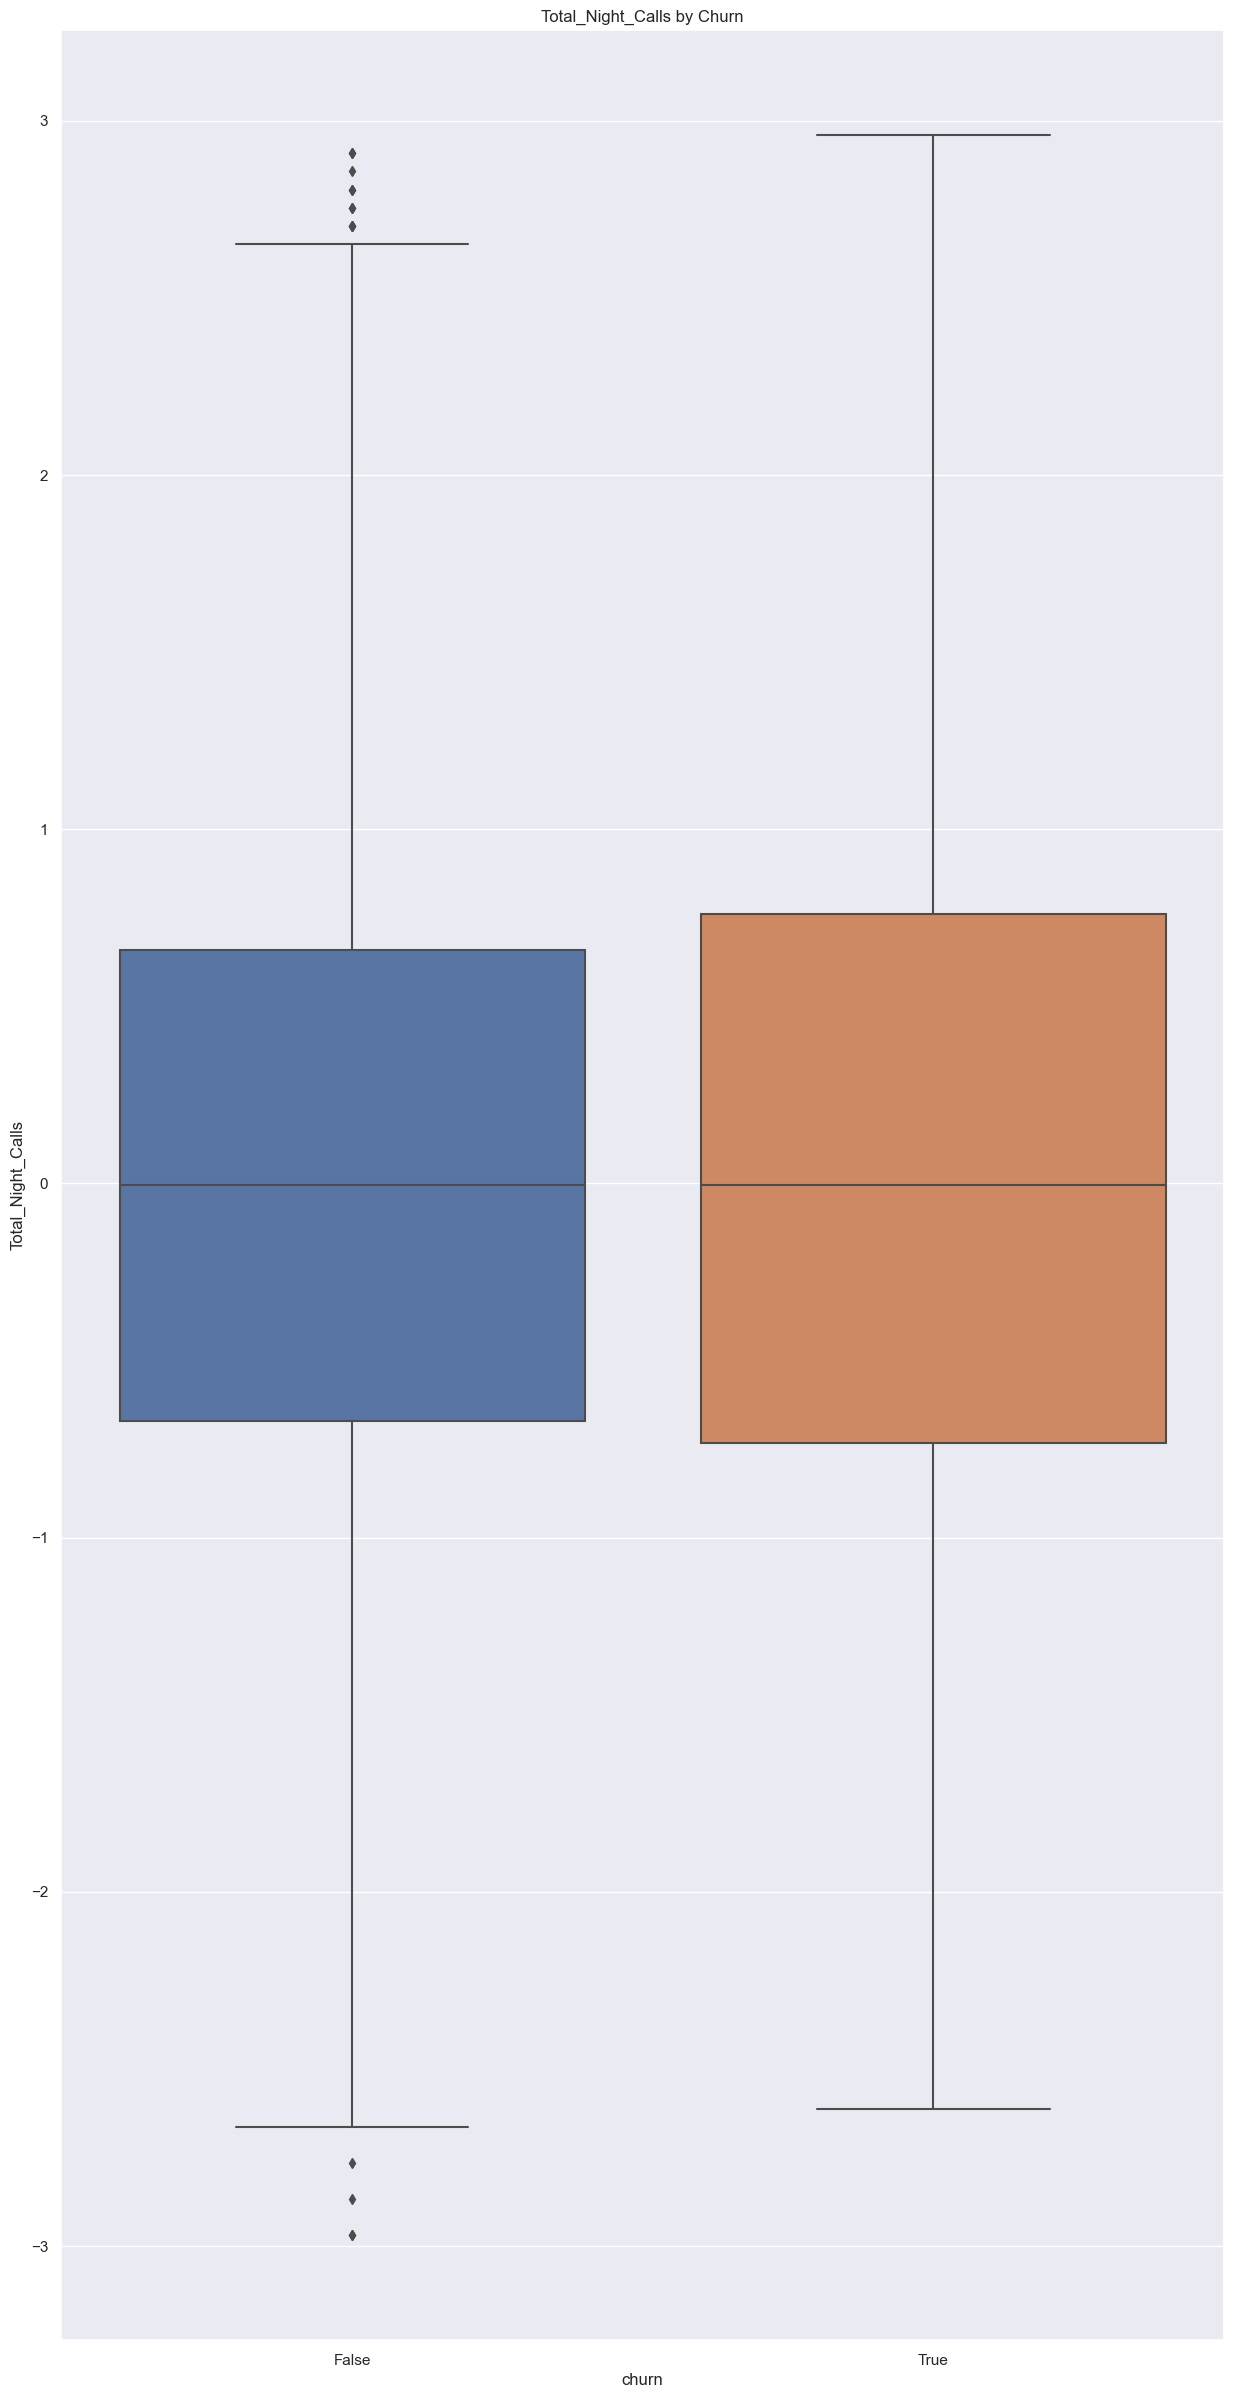

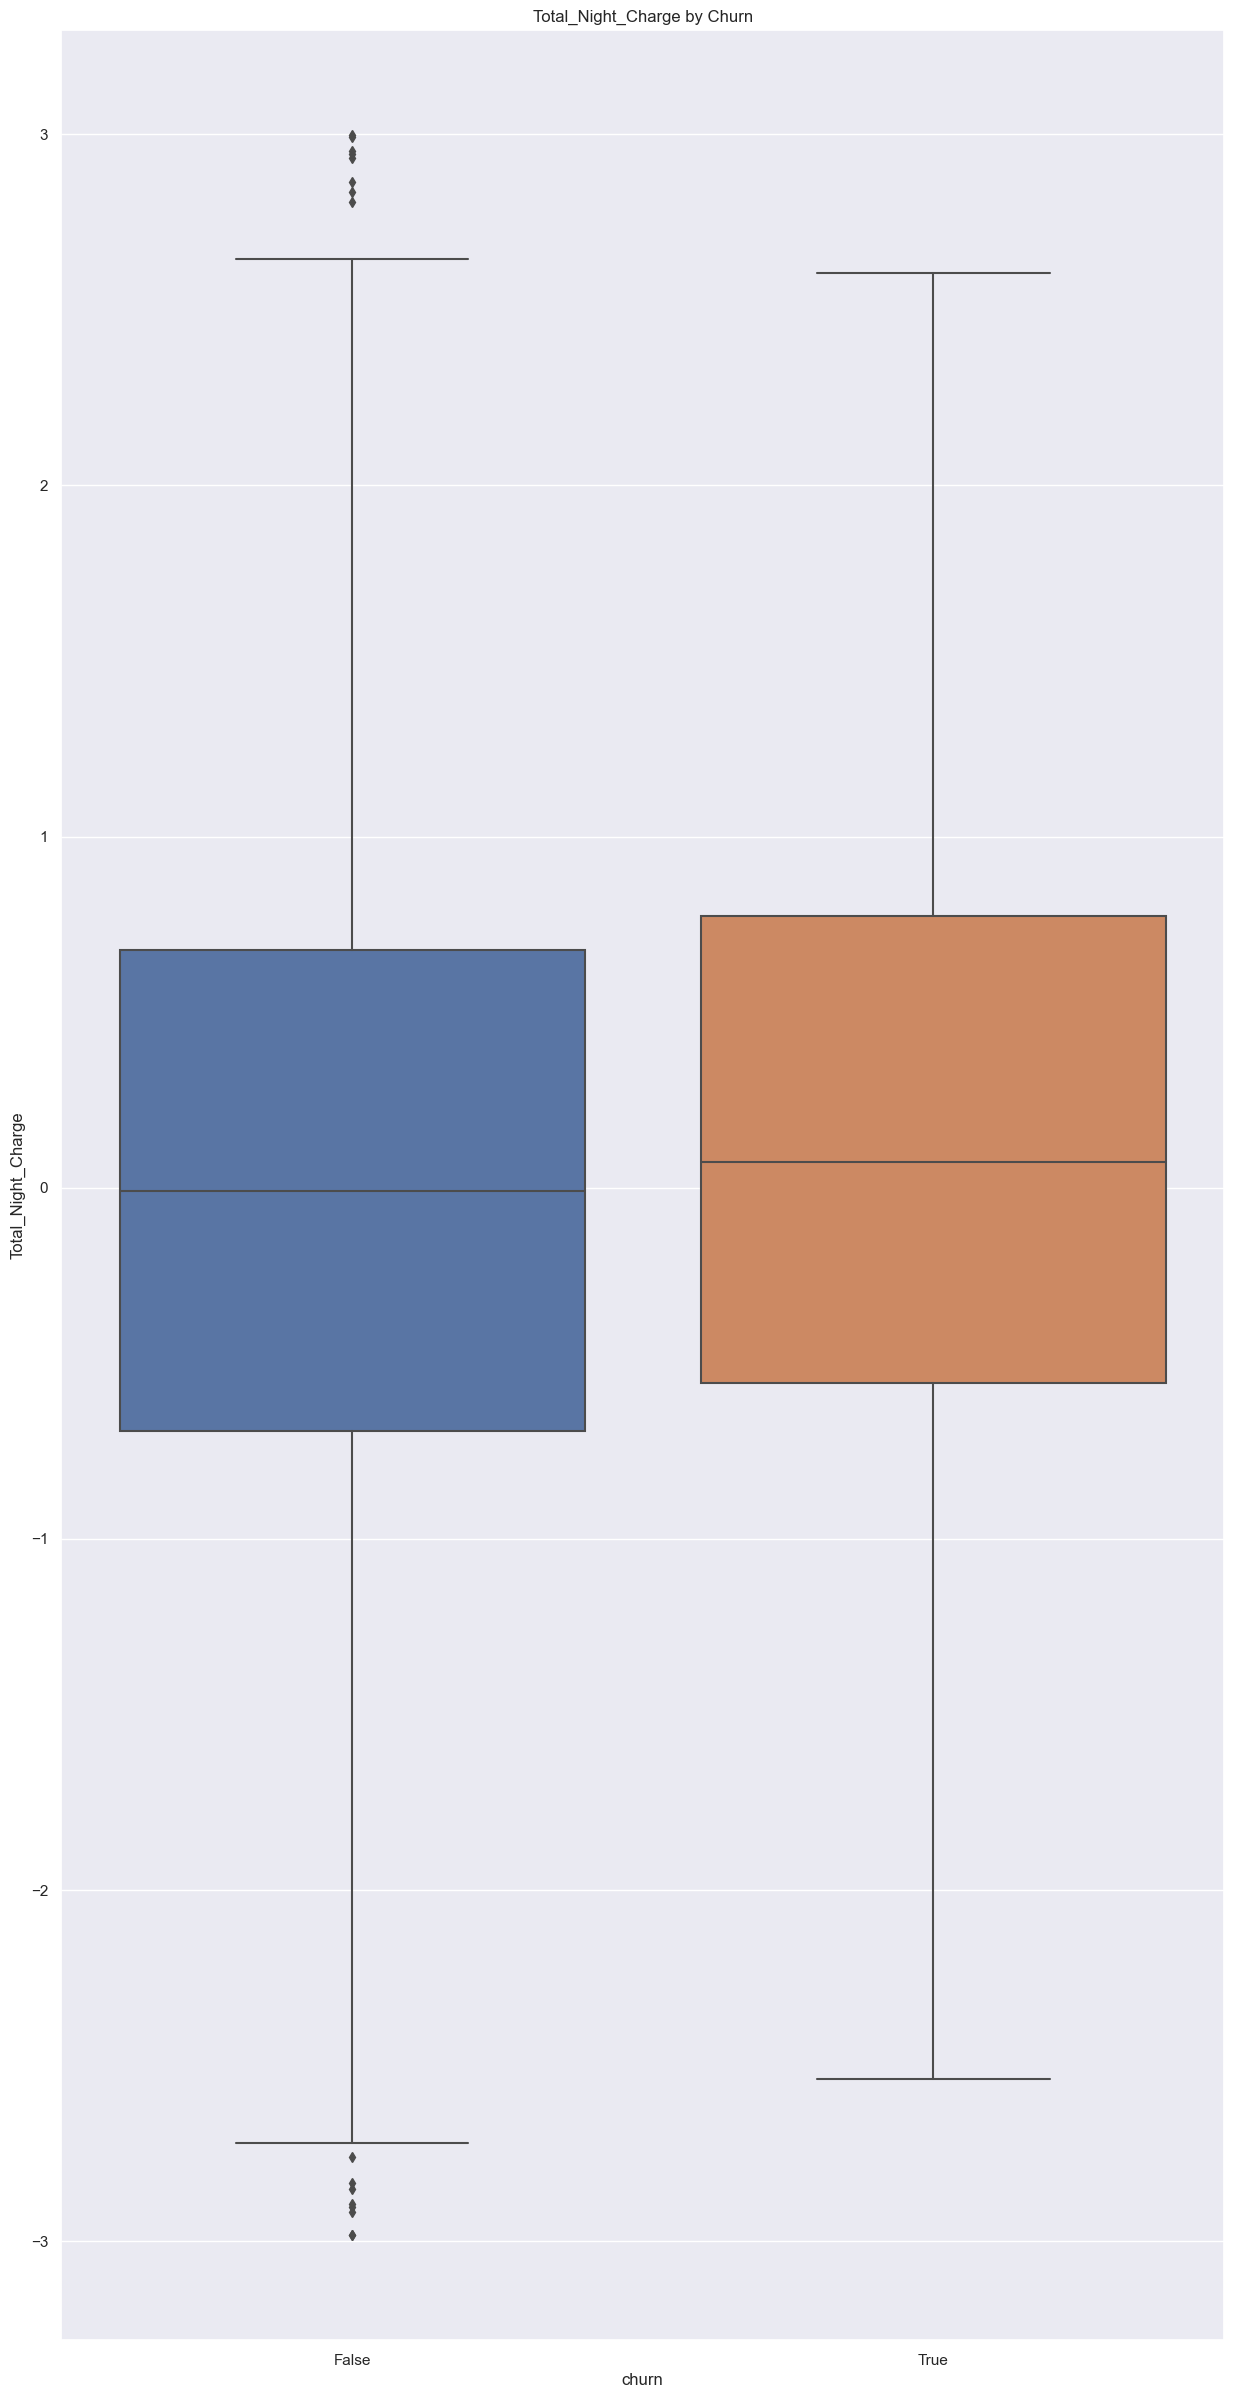

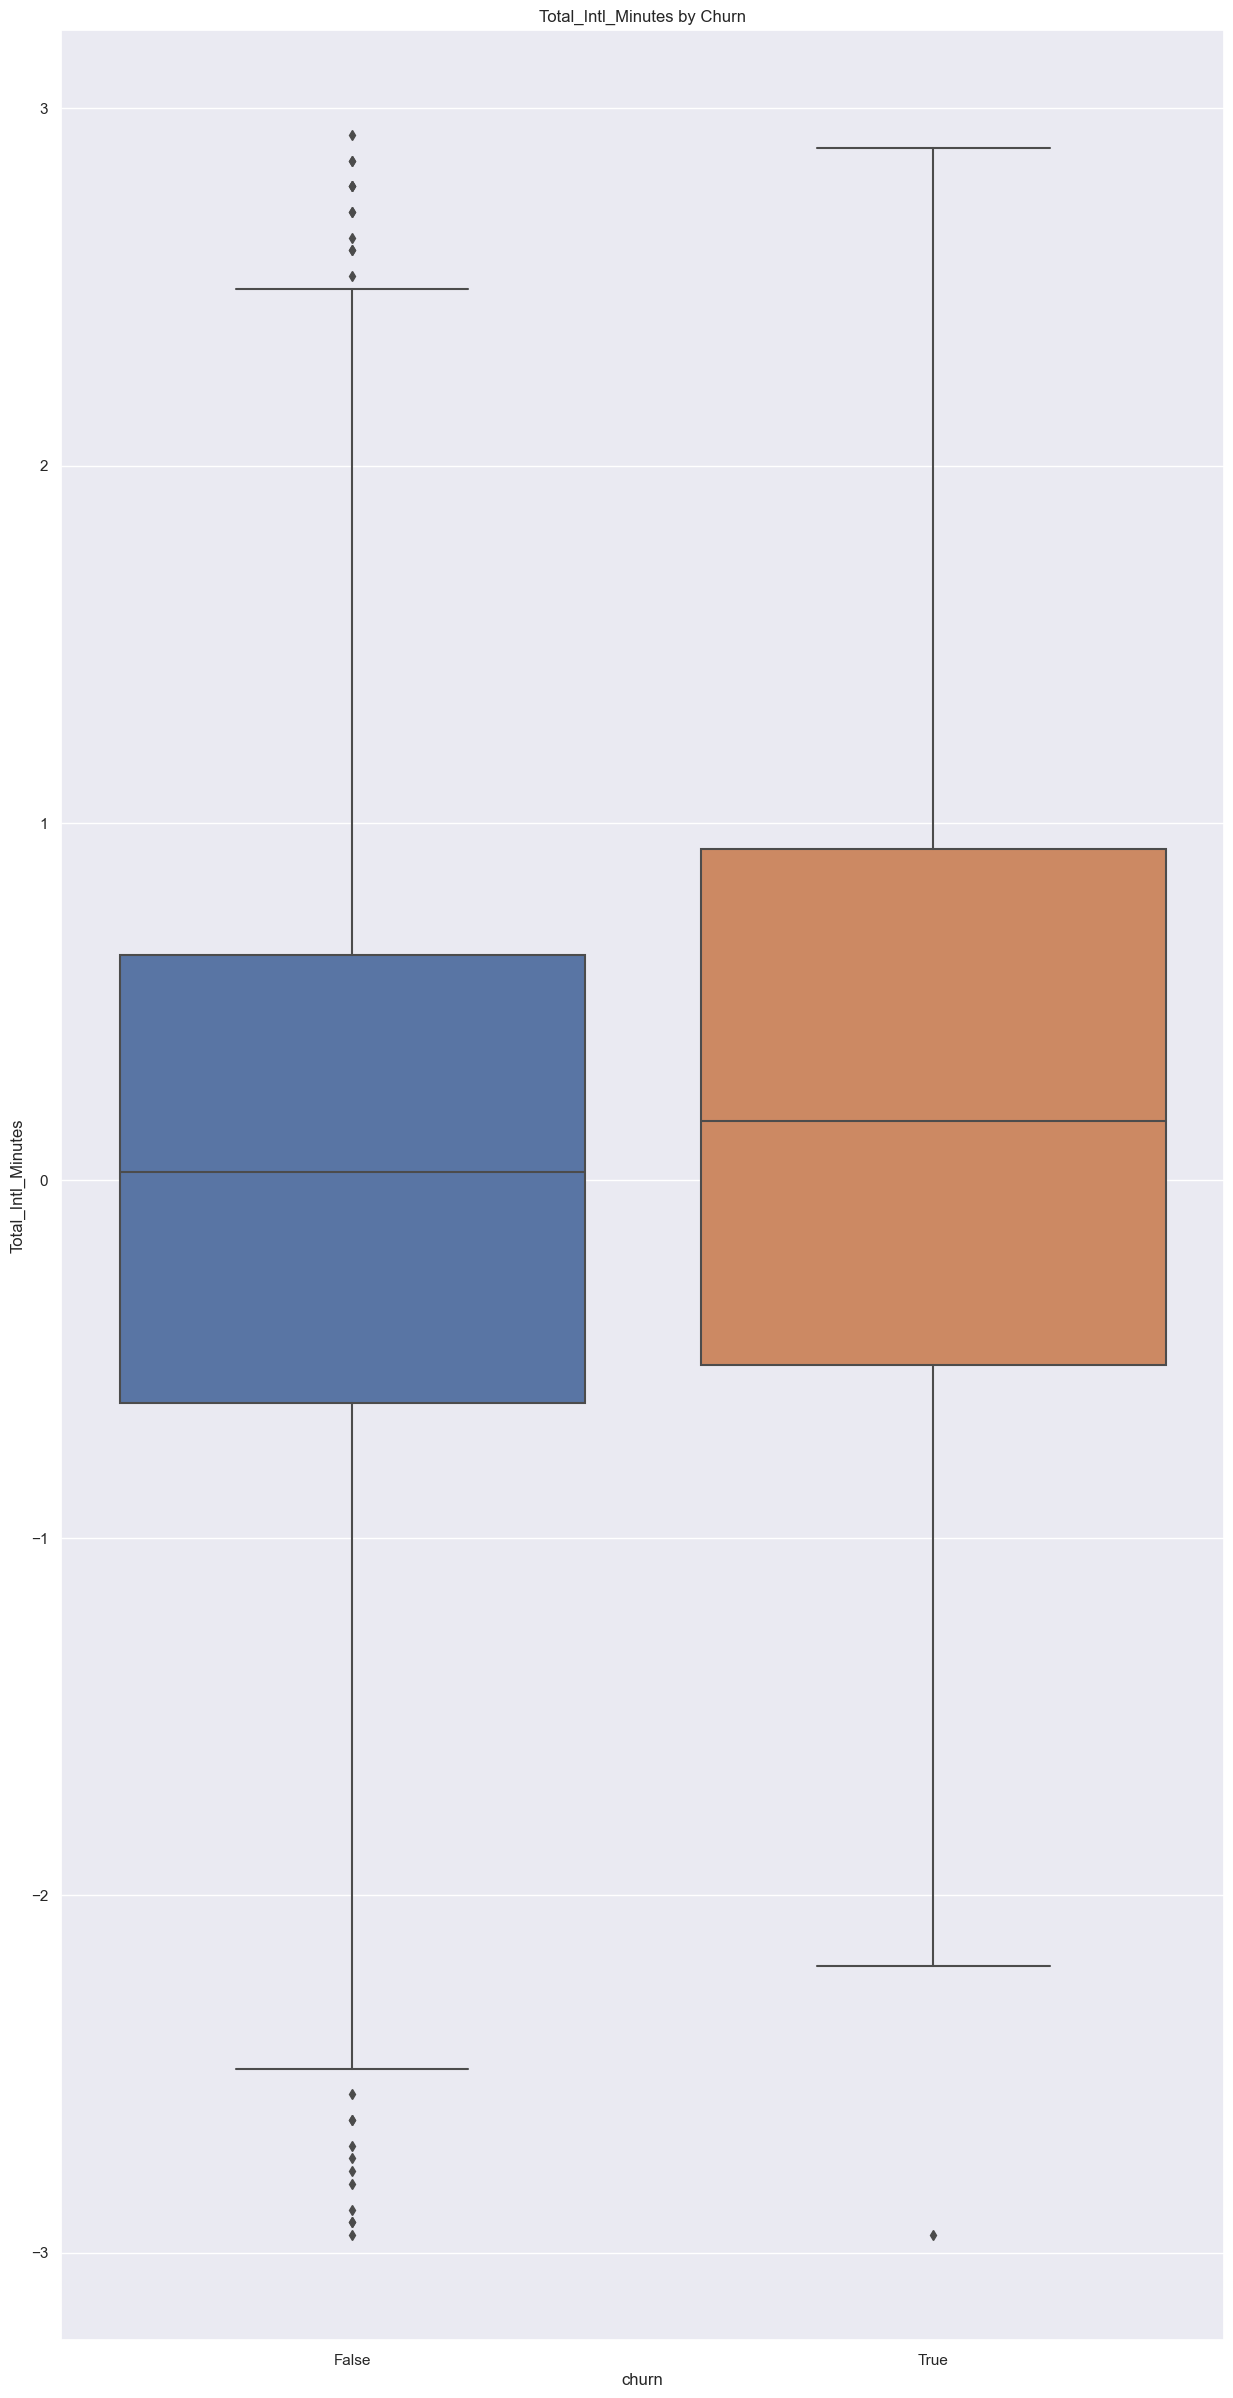

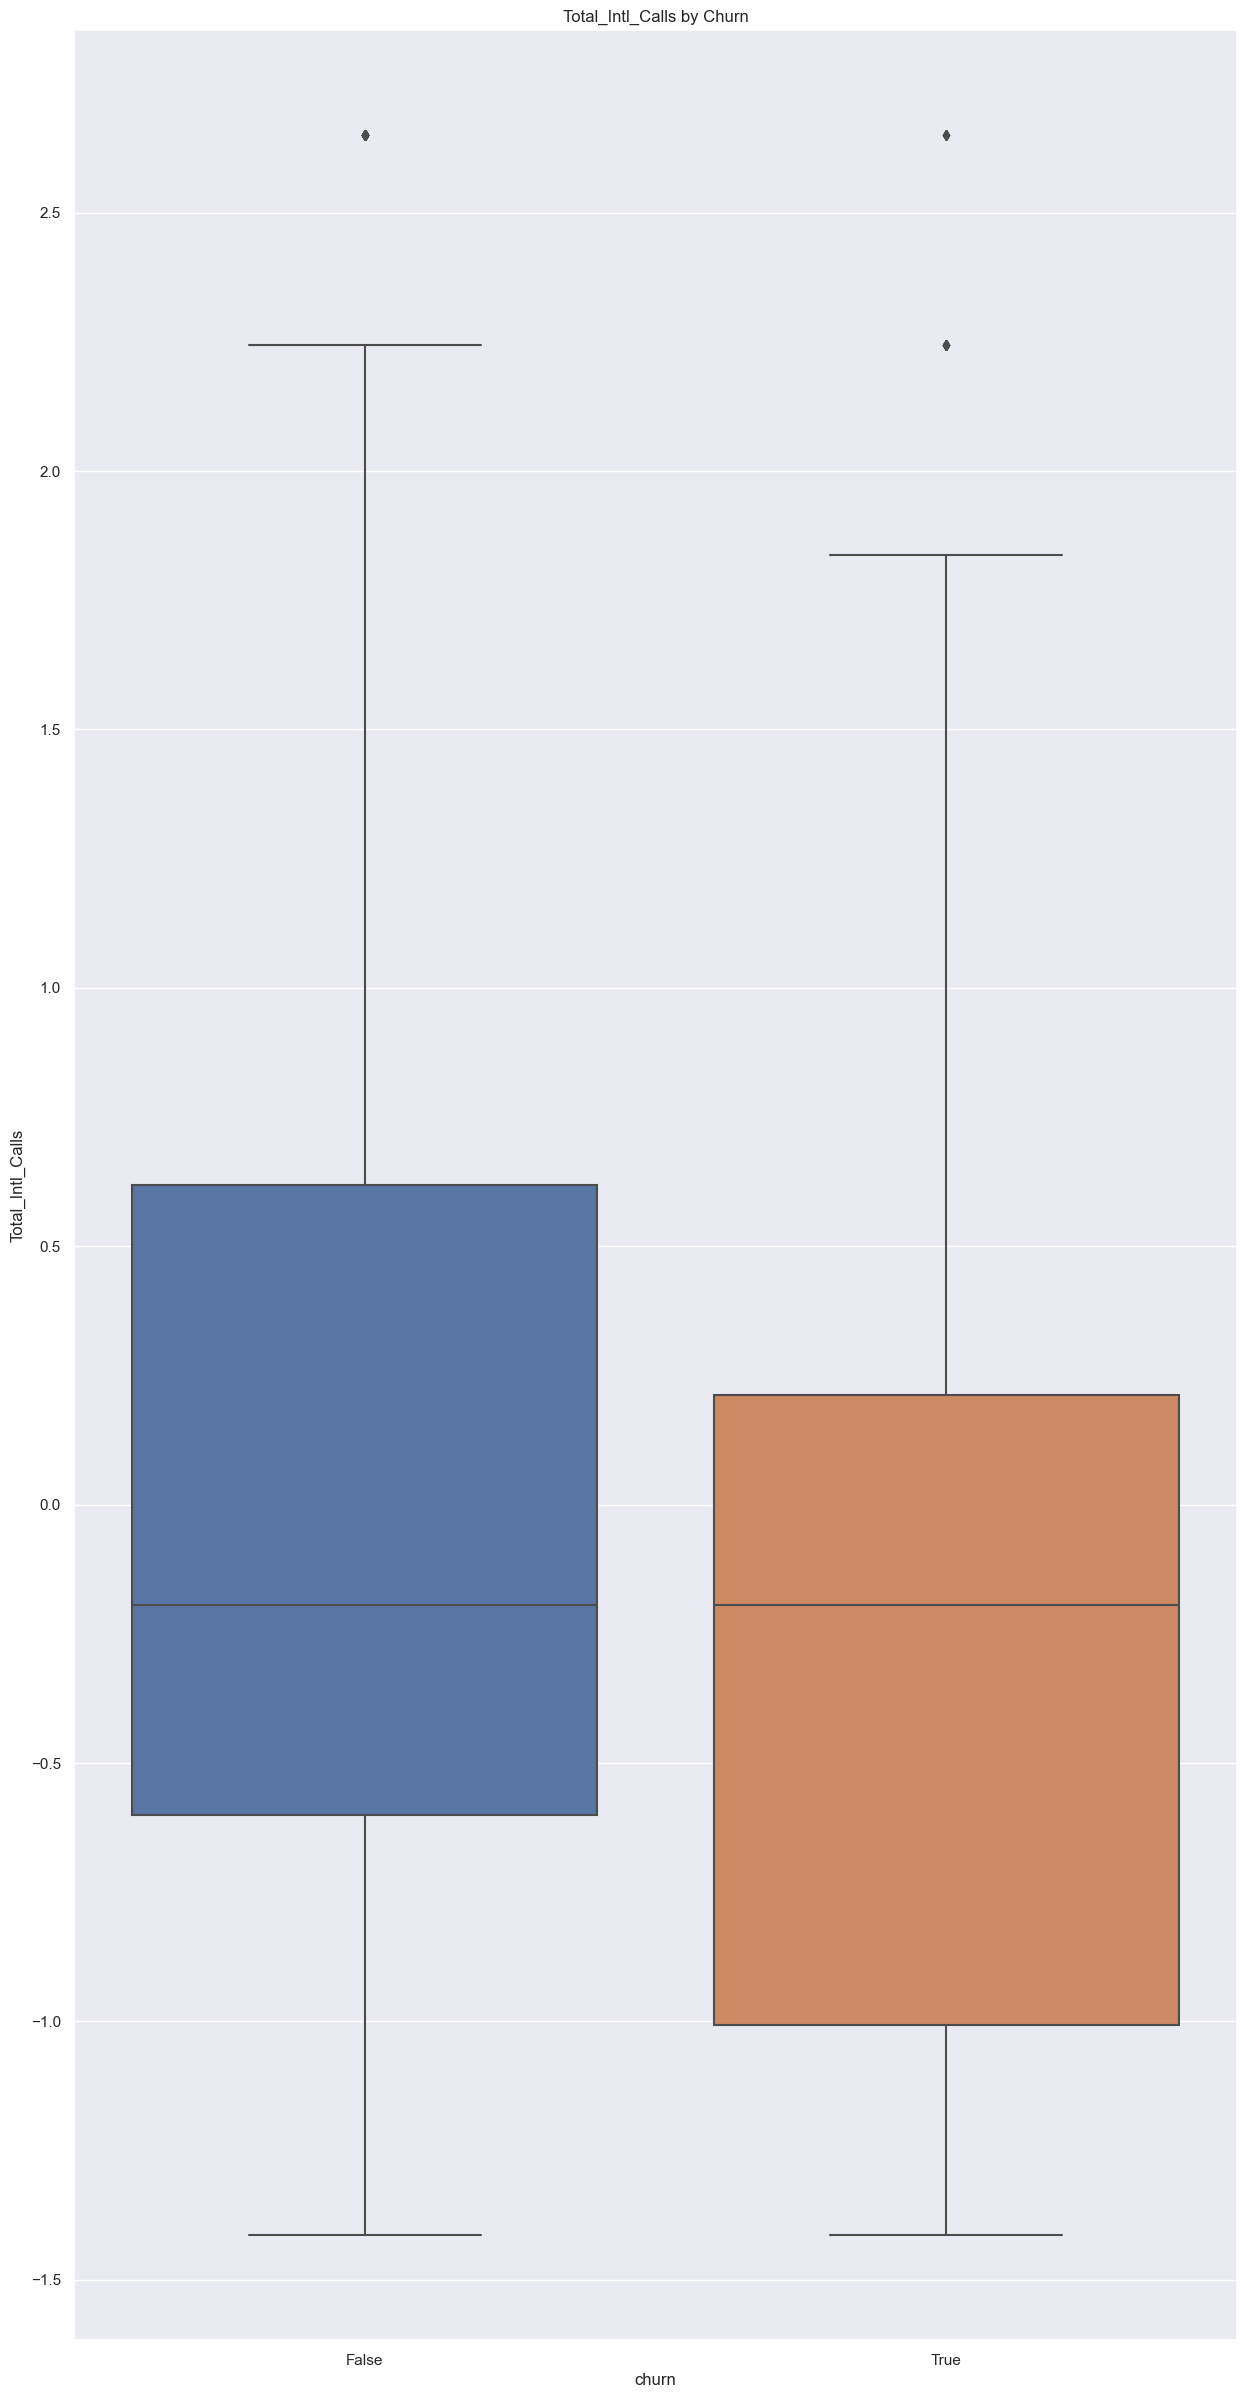

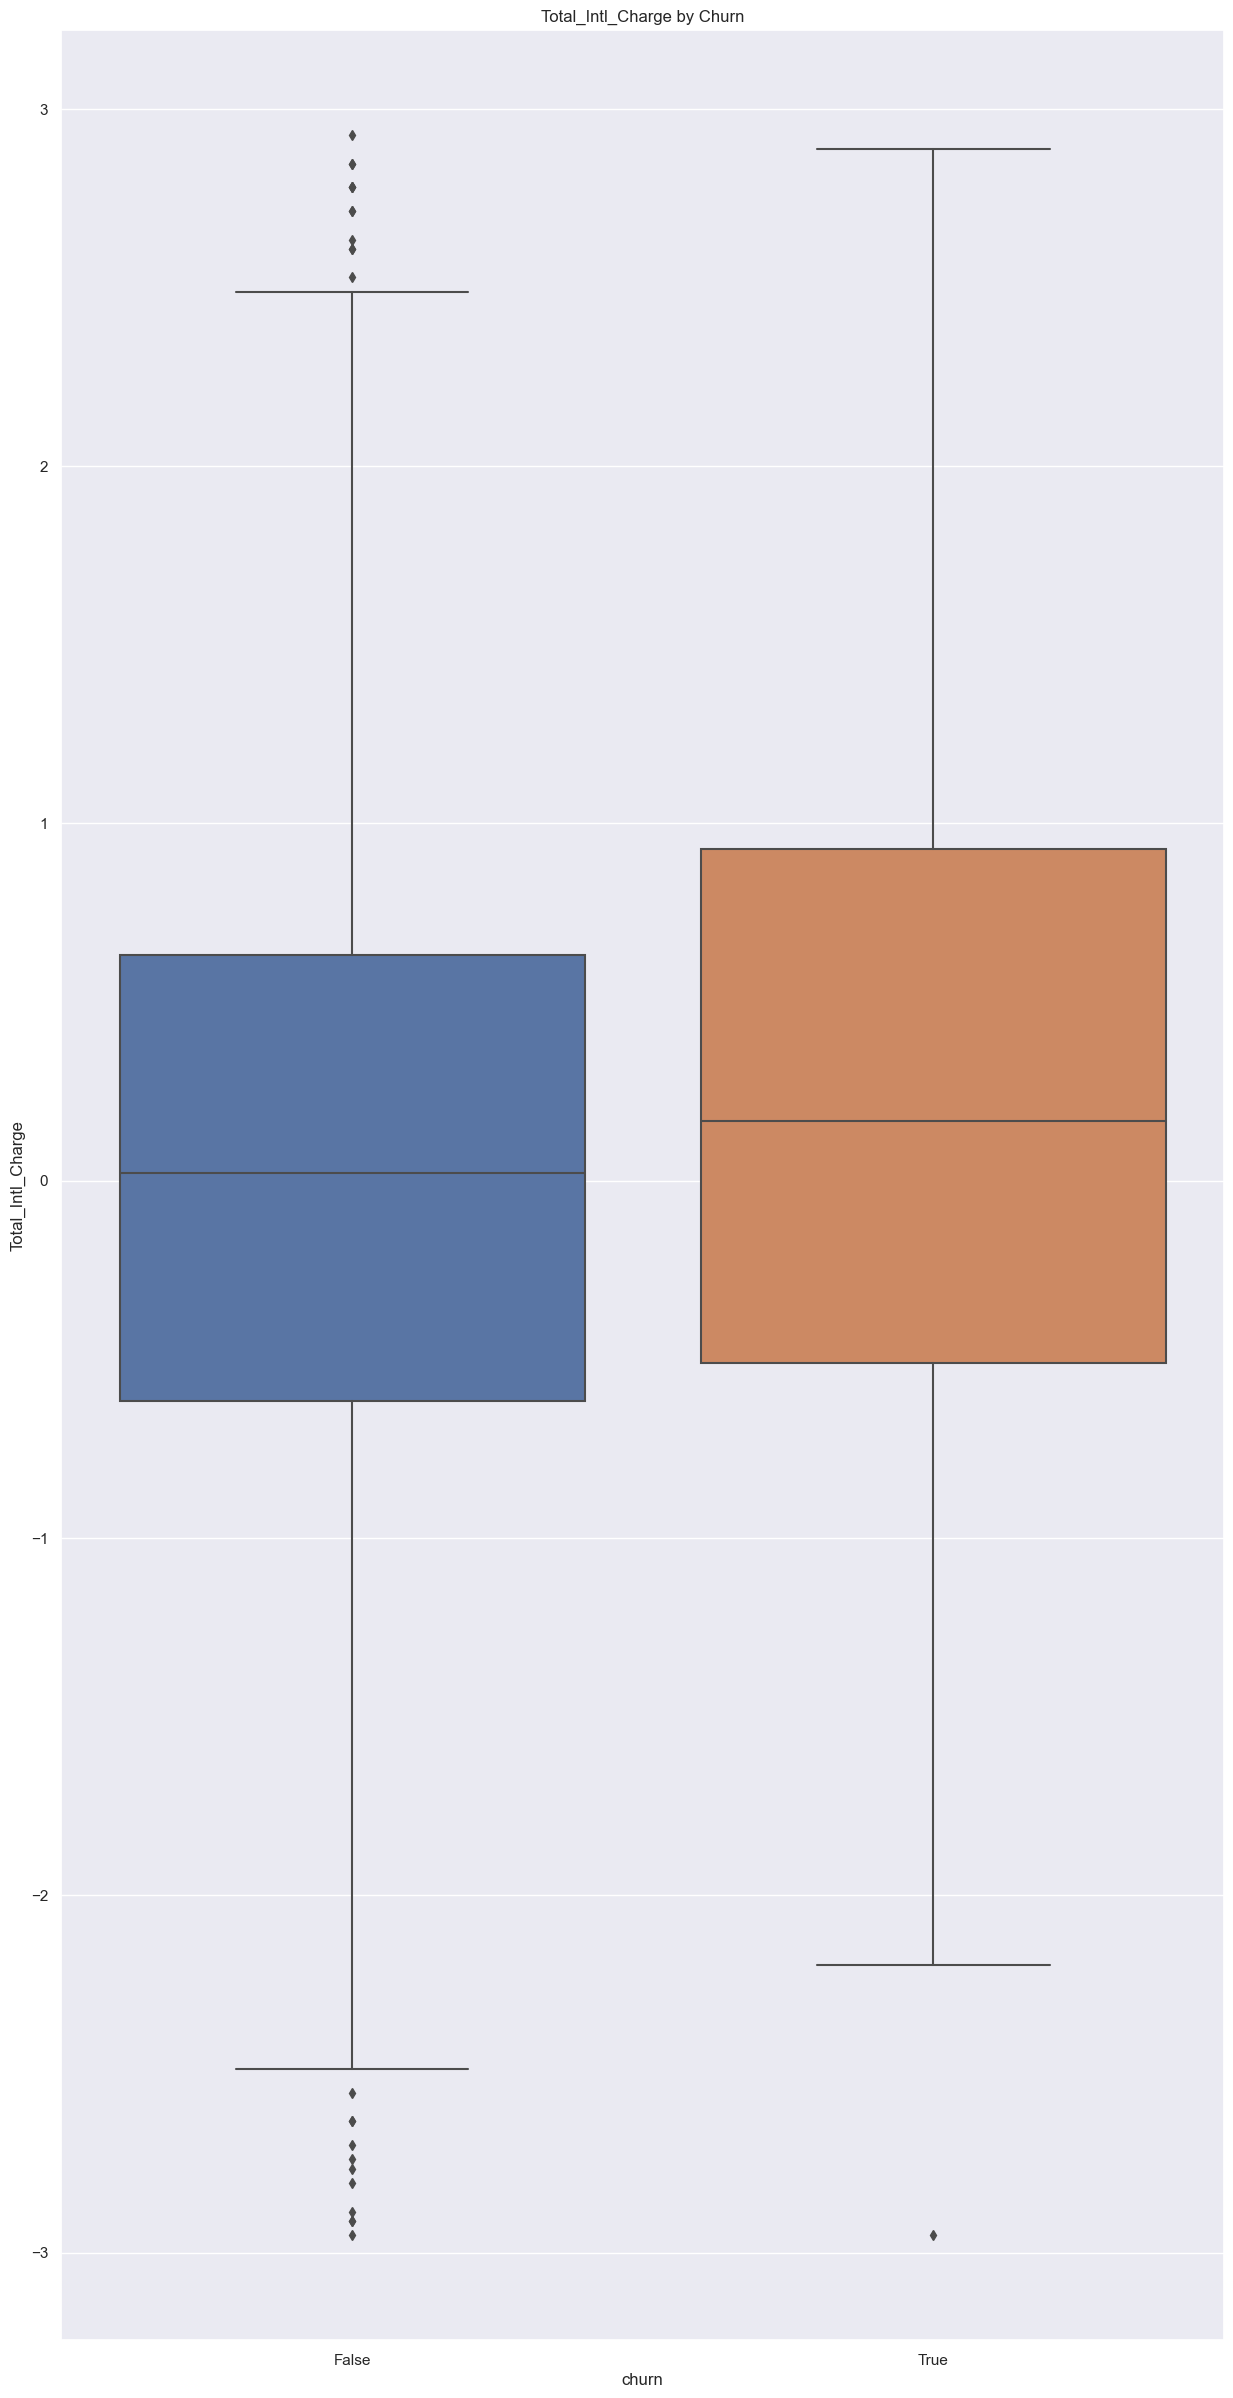

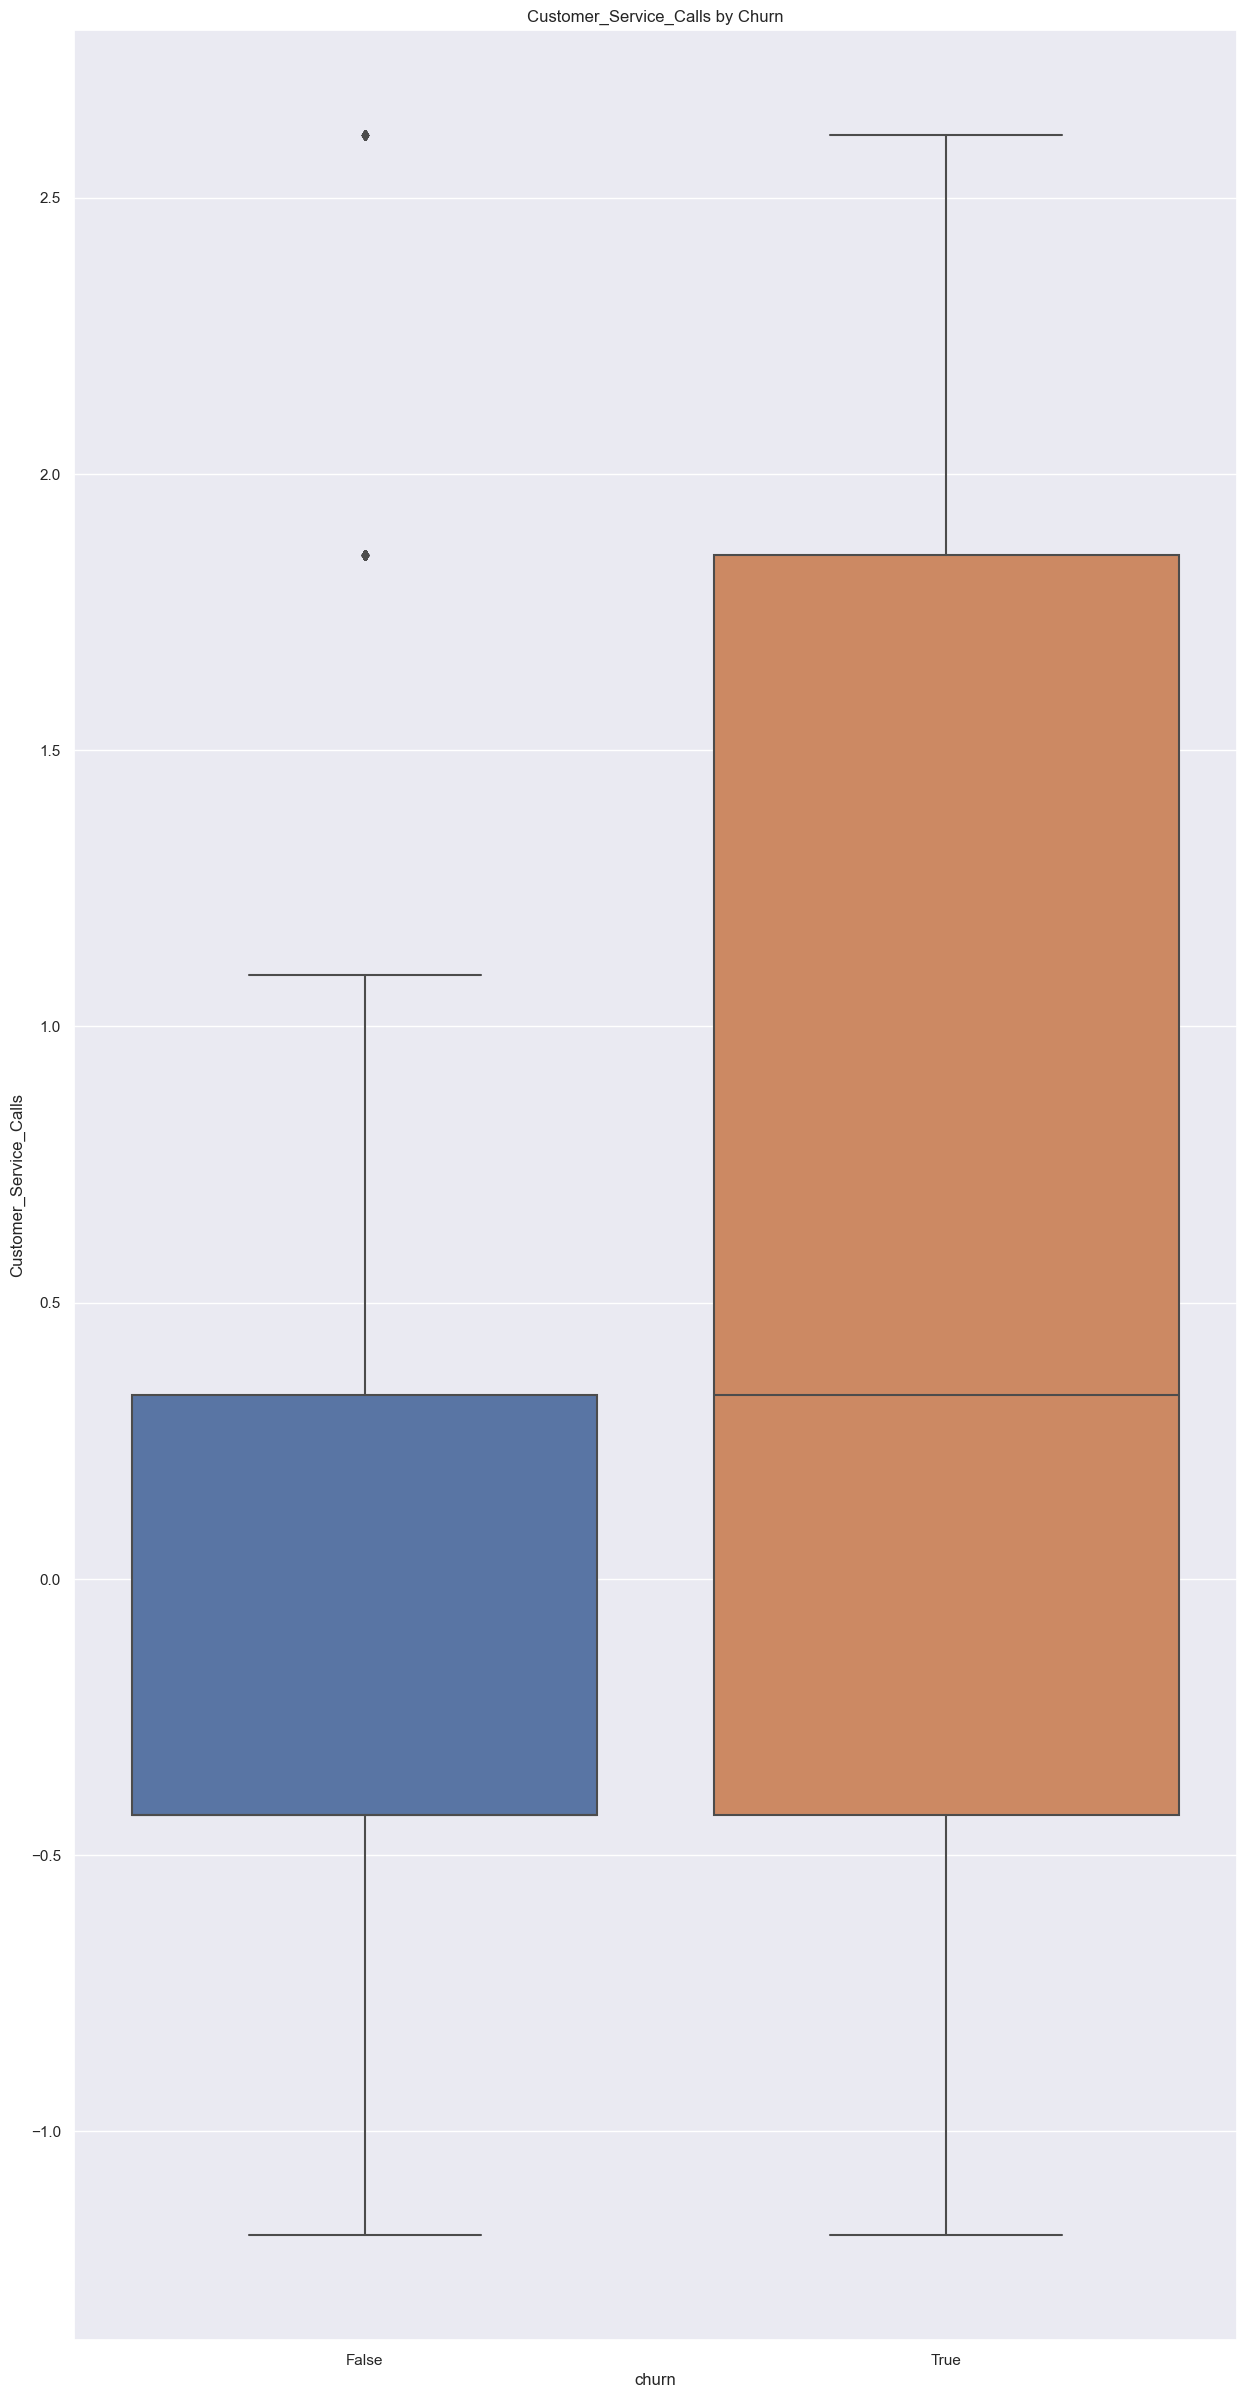

In [ ]:
# Plot box plots for each numeric columns
num_cols = len(numeric_columns.columns)
cols_per_row = 3
num_rows = (num_cols - 1) // cols_per_row + 1

for feature in numeric_columns:
    plt.figure(figsize=(15, 5 * num_rows))
    sns.boxplot(x='churn', y=feature, data=df)
    plt.title(f'{feature} by Churn')
    plt.show()

In [ ]:
__Plot Catrgorical against Churn__

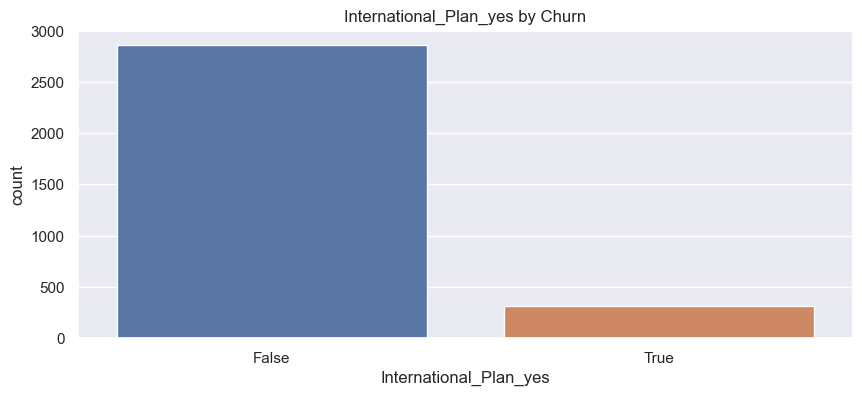

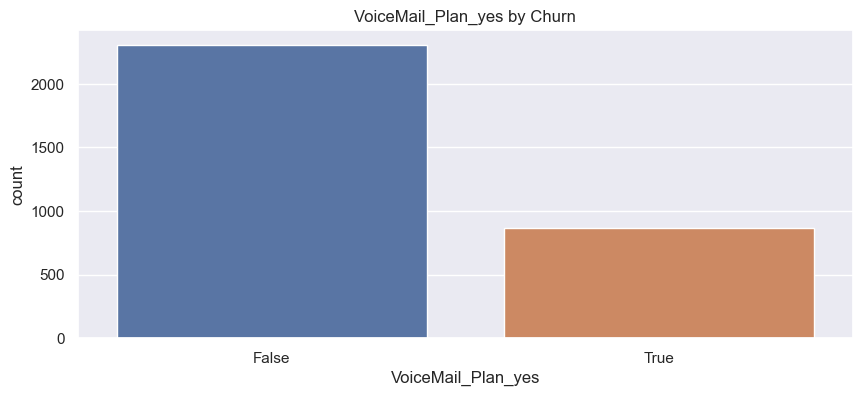

In [ ]:


categorical_cols = ['International_Plan_yes', 'VoiceMail_Plan_yes']

# Calculate the number of categorical columns
cat_cols = len(categorical_cols)

# Define number of columns per row for display purposes
cols_per_row = 3

# Calculate the number of rows needed
num_rows = (cat_cols - 1) // cols_per_row +1

# Loop through each categorical column and plot
for feature in categorical_cols:
    if feature != 'churn':
        plt.figure(figsize=(10, 4))
        sns.countplot(x=feature,data=df)
        plt.title(f'{feature} by Churn')
        plt.show()

__MULTITIVARIATE ANALYSIS__

__LOGISTIC REGRESSION__

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


__SPLIT THE DATA__

In [ ]:
X = df.drop(columns=['churn'])
y = df['churn']

In [ ]:
#Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Train and Fit logistic regression model
logreg = LogisticRegression(fit_intercept= False, C=1e12, solver ='liblinear')
model= logreg.fit(X_train, y_train)
model

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [ ]:
#Model evaluation
y_hat_train = logreg.predict(X_train)
train_residuals = np.logical_xor(y_train, y_hat_train).astype(int)
print(pd.Series(train_residuals,name="Residuals (counts)").value_counts())
print()
print(pd.Series(train_residuals,name="Residuals (proportions)").value_counts(normalize=True))

Residuals (counts)
0    1924
1     299
Name: count, dtype: int64

Residuals (proportions)
0    0.865497
1    0.134503
Name: proportion, dtype: float64


Not bad, our classiffier has about 86% accuracy on the training data

In [ ]:
#Performance on test data
y_hat_test= logreg.predict(X_test)
test_residuals = np.logical_xor(y_test, y_hat_test).astype(int)
print(pd.Series(test_residuals,name="Residuals (counts)").value_counts())
print()
print(pd.Series(test_residuals,name="Residuals (proportions)").value_counts(normalize=True))

Residuals (counts)
0    833
1    120
Name: count, dtype: int64

Residuals (proportions)
0    0.874082
1    0.125918
Name: proportion, dtype: float64


We got 86% precision on the test data

In [ ]:
#Performance evaluation on prediction
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.90      0.96      0.93       830
        True       0.52      0.27      0.35       123

    accuracy                           0.87       953
   macro avg       0.71      0.62      0.64       953
weighted avg       0.85      0.87      0.86       953

[[800  30]
 [ 90  33]]


__RANDOM FOREST__

Feature ranking:
1. feature Total_Day_Charge (0.14445253304441116)
2. feature Total_Day_Minutes (0.1443009549887905)
3. feature Customer_Service_Calls (0.09427520565159918)
4. feature International_Plan_yes (0.06792412769379803)
5. feature Total_Eve_Minutes (0.06581040644445224)
6. feature Total_Eve_Charge (0.06560339345648755)
7. feature Total_Intl_Calls (0.052910435209461745)
8. feature Total_Intl_Charge (0.04290779914333803)
9. feature Total_Intl_Minutes (0.042873900731497966)
10. feature Total_Night_Charge (0.040565726053018364)
11. feature Total_Night_Minutes (0.039367488547818526)
12. feature Total_Day_Calls (0.035885803770313945)
13. feature Phone_Number (0.033419513928975346)
14. feature Number_Vmail_Messages (0.03318913433970324)
15. feature VoiceMail_Plan_yes (0.03099524178915361)
16. feature Total_Night_Calls (0.03011569418406371)
17. feature Total_Eve_Calls (0.027041138262208823)
18. feature Area_code (0.008361502760907975)


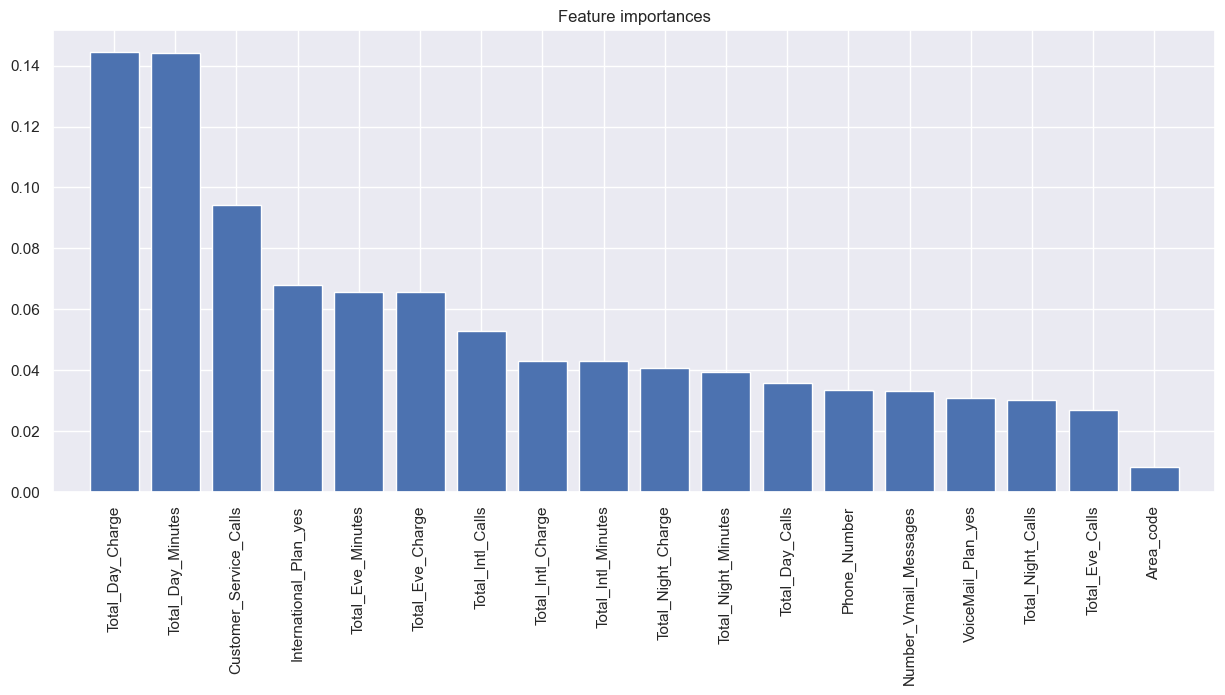

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a RandomForest model
model = RandomForestClassifier().fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Print the feature ranking
print("Feature ranking:")

for f in range(len(features)):
    print(f"{f + 1}. feature {features[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances
plt.figure(figsize=(15, 6))
plt.title("Feature importances")
plt.bar(range(len(features)), importances[indices], align="center")
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=90)
plt.xlim([-1, len(features)])
plt.show()

The random forest results indicate the total day charge and Total day minutes rank top in the features that affect customer churn while the area code has the least influence in the customer churn.

__KNN__

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Encoding categorical variables if necessary
df['International_Plan_yes'] = df['International_Plan_yes'].map({'yes': 1, 'no': 0})
df['VoiceMail_Plan_yes'] = df['VoiceMail_Plan_yes'].map({'yes': 1, 'no': 0})
# Selecting features and target
X = df.drop(columns=['churn'])  # Dropping irrelevant columns
y = df['churn'].map({'yes': 1, 'no': 0})  # Encoding target variable

# Step 3: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Standardize the Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Train the KNN Model
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune this parameter
knn.fit(X_train, y_train)

# Step 6: Evaluate the Model
y_pred = knn.predict(X_test)

# Print the evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

C:\Users\ADMIN\anaconda3\anaconda\Lib\site-packages\sklearn\utils\extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\ADMIN\anaconda3\anaconda\Lib\site-packages\sklearn\utils\extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\ADMIN\anaconda3\anaconda\Lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

__REGRESSION TREES__

In [ ]:
#Fit a regression tree
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42, max_depth=3)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [ ]:
#Prediction and evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# Make predictions and evaluate
y_pred = regressor.predict(X_test)
print('MSE score:', mse(y_test, y_pred))
print('R-sq score:', r2_score(y_test,y_pred))

MSE score: 0.0751635050869266
R-sq score: 0.33133341373795167


In [ ]:
#Visualize the  model fit
X_grid = np.linspace(min(X), max(X))
X_grid = X_grid.reshape((len(X_grid), 1))
plt.figure(figsize=(15,6))
plt.scatter(X, y, color = 'red', label='data')
plt.plot(X_grid, regressor.predict(X_grid), color = 'green', label='Regression function')
plt.title('Decision Tree Regression')
plt.xlabel('Features')
plt.ylabel('Target')
plt.legend()
plt.show()


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U9'), dtype('float64')) -> None